# Librerías Recomendadas

- El uso de las librerías para este trabajo es libre, aqui te recomendamos algunas.

In [1]:
#%pip install statsmodels seaborn matplotlib plotly scikit-learn

# Biblioteca para funciones estadísticas
import statsmodels.api as sm

# Bibliotecas para estructura de datos y operaciones matemáticas
import pandas as pd
import numpy as np

# Bibliotecas para gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Carga, procesamiento de Datos y EDA

## Cargar Data

- Cada línea representa una visita de un usuario (id) a la tienda
- La incidencia de compra es 1 si el cliente llegó a comprar un producto, 0 si no compró
- Tambien se incluyen columnas asociadas al cliente (genero,edad, educación...etc..) y a los productos (marca,precio,cantidad...)

In [2]:
# Se lee el dataset
data_compras = pd.read_csv("compras_data.csv", sep=",")
data_compras

,id,dia_visita,incidencia_compra,id_marca,cantidad,ultima_marca_comprada,ultima_cantidad_comprada,precio_marca_1,precio_marca_2,precio_marca_3,...,promo_marca_3,promo_marca_4,promo_marca_5,genero,estado_civil,edad,nivel_educacion,ingreso_anual,ocupacion,tamanio_ciudad
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,1,0,0,0,0,42,1,120946,1,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,0,42,1,120946,1,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,0,42,1,120946,1,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,0,42,1,120946,1,0


## Procesamiento de Datos

- Aquí deberá aplicar las operaciones necesarias para transformar los datos, crear nuevas variables o estadísticos que aporten al análisis exploratorio de datos

In [3]:
data_compras.columns

Index(['id', 'dia_visita', 'incidencia_compra', 'id_marca', 'cantidad',
       'ultima_marca_comprada', 'ultima_cantidad_comprada', 'precio_marca_1',
       'precio_marca_2', 'precio_marca_3', 'precio_marca_4', 'precio_marca_5',
       'promo_marca_1', 'promo_marca_2', 'promo_marca_3', 'promo_marca_4',
       'promo_marca_5', 'genero', 'estado_civil', 'edad', 'nivel_educacion',
       'ingreso_anual', 'ocupacion', 'tamanio_ciudad'],
      dtype='object')

In [4]:
data_compras.describe()

,id,dia_visita,incidencia_compra,id_marca,cantidad,ultima_marca_comprada,ultima_cantidad_comprada,precio_marca_1,precio_marca_2,precio_marca_3,...,promo_marca_3,promo_marca_4,promo_marca_5,genero,estado_civil,edad,nivel_educacion,ingreso_anual,ocupacion,tamanio_ciudad
count,5.869300e+04,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,...,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,2.000003e+08,349.431074,0.249399,0.844309,0.691973,0.840799,0.248070,1.392074,1.780999,2.006789,...,0.042799,0.117851,0.035865,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,1.443167e+02,212.045058,0.432669,1.633083,1.498734,1.631628,0.431897,0.091139,0.170868,0.046867,...,0.202405,0.322434,0.185954,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,2.000000e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1.260000,1.870000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,2.000001e+08,161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.340000,1.580000,1.970000,...,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,2.000003e+08,343.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.390000,1.880000,2.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,2.000004e+08,530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470000,1.890000,2.060000,...,0.000000,0.000000,0.000000,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,2.000005e+08,730.000000,1.000000,5.000000,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,...,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


### Separando a los clientes

In [5]:
client_columns = ["id","genero","estado_civil","edad","nivel_educacion","ingreso_anual","ocupacion","tamanio_ciudad"]

In [6]:
def get_price(row: pd.Series) -> float:
    column_mark = ["precio_marca_1","precio_marca_2","precio_marca_3","precio_marca_4","precio_marca_5"]
    product = int(row["id_marca"])
    if product ==0:
        return 0
    return row[column_mark[product-1]] * row["cantidad"]

def bought_at_sale(row: pd.Series) -> int:
    column_mark = ["promo_marca_1","promo_marca_2","promo_marca_3","promo_marca_4","promo_marca_5"]
    if int(row["cantidad"]) == 0:
        return 0
    for column in column_mark:
        got_promo = int(row[column])
        if got_promo == 1:
            return 1
    return 0

def bought_price(row: pd.Series) -> int:
    column_mark = ["precio_marca_1","precio_marca_2","precio_marca_3","precio_marca_4","precio_marca_5"]
    product = int(row["id_marca"])
    if product ==0:
        return 0
    return row[column_mark[product-1]]



In [7]:
data_compras["total_dia"] = data_compras.apply(get_price,axis=1)

In [8]:
data_compras["compra_promo"] = data_compras.apply(bought_at_sale,axis=1)

In [9]:
data_compras["precio_compra"] = data_compras.apply(bought_price,axis=1)

In [10]:
data_compras["incidencia_compra"]

0        0
1        0
2        0
3        0
4        0
        ..
58688    0
58689    0
58690    0
58691    1
58692    0
Name: incidencia_compra, Length: 58693, dtype: int64

In [11]:
data_compras["dias_ult_visita"] = 0
data_compras["dias_ult_compra"] = 0
data_compras["dias_ult_promo"] = 0
data_compras["dias_ult_compra_full"] = 0
for i in range(0,data_compras.shape[0]):
    cur_row = data_compras.iloc[i]
    if i <1 or cur_row["id"] != data_compras.iloc[i-1]["id"]:
        ult_visita = int(cur_row["dia_visita"])
        ult_compra = int(cur_row["dia_visita"])
        ult_promo = int(cur_row["dia_visita"])
        ult_compra_full = int(cur_row["dia_visita"])
    else:
        prev_row = data_compras.iloc[i-1]
        ult_visita = int(cur_row["dia_visita"]) - int(prev_row["dia_visita"])
        ult_compra = ult_visita + int(prev_row["dias_ult_compra"]) if int(prev_row["incidencia_compra"])==0 else 0
        ult_promo = ult_visita + int(prev_row["dias_ult_promo"]) if int(prev_row["compra_promo"])==0 else 0
        ult_compra_full = ult_visita + int(prev_row["dias_ult_compra_full"]) if int(prev_row["incidencia_compra"])==0 or int(prev_row["compra_promo"]) == 1  else 0
    data_compras.at[i,"dias_ult_visita"] = ult_visita
    data_compras.at[i,"dias_ult_compra"] = ult_compra
    data_compras.at[i,"dias_ult_promo"] = ult_promo
    data_compras.at[i,"dias_ult_compra_full"] = ult_compra_full
data_compras

,id,dia_visita,incidencia_compra,id_marca,cantidad,ultima_marca_comprada,ultima_cantidad_comprada,precio_marca_1,precio_marca_2,precio_marca_3,...,ingreso_anual,ocupacion,tamanio_ciudad,total_dia,compra_promo,precio_compra,dias_ult_visita,dias_ult_compra,dias_ult_promo,dias_ult_compra_full
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,110866,1,0,0.00,0,0.00,1,1,1,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,110866,1,0,0.00,0,0.00,10,11,11,11
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,110866,1,0,0.00,0,0.00,1,12,12,12
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,110866,1,0,0.00,0,0.00,4,16,16,16
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,110866,1,0,0.00,0,0.00,2,18,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,120946,1,0,0.00,0,0.00,6,0,59,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,120946,1,0,0.00,0,0.00,7,7,66,7
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,120946,1,0,0.00,0,0.00,7,14,73,14
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,120946,1,0,5.46,0,1.82,5,19,78,19


In [12]:
data_compras.shape

(58693, 31)

In [13]:
data_cliente_compra = data_compras.loc[data_compras["incidencia_compra"]>0]
data_cliente_compra.shape

(14638, 31)

In [14]:
data_cliente_compra_producto = data_cliente_compra.groupby(client_columns + ["id_marca"]).agg(
    cantidad_cum = ("cantidad","sum"),
).reset_index()
indices = data_cliente_compra_producto.groupby(client_columns)['cantidad_cum'].idxmax().reset_index(drop=True)
data_producto_comprado = data_cliente_compra_producto.merge(right=indices, how="inner", left_index=True, right_on="cantidad_cum")[["id","id_marca"]]
data_producto_comprado.rename(columns={"id_marca":"id_marca_max_count"},inplace=True)

In [15]:
data_cliente_left = data_cliente_compra.groupby(client_columns).agg(
    total_dia_max = ("total_dia", "max"),
    total_dia_min = ("total_dia", "min"),
    total_dia_mean = ("total_dia", "mean"),
    total_dia_median = ("total_dia", "median"),
    total_dia_sum = ("total_dia", "sum"),
    incidencia_compra_sum = ("incidencia_compra", "sum"),
    compra_promo_sum = ("compra_promo", "sum"),
    id_marca_mode = ("id_marca", pd.Series.mode),
    dias_ult_visita_max = ("dias_ult_visita", "max"),
    dias_ult_visita_min = ("dias_ult_visita", "min"),
    dias_ult_visita_median = ("dias_ult_visita", "median"),
    dias_ult_visita_mean = ("dias_ult_visita", "mean"),
    dias_ult_compra_max = ("dias_ult_compra", "max"),
    dias_ult_compra_median = ("dias_ult_compra", "median"),
    dias_ult_promo_max = ("dias_ult_promo", "max"),
    dias_ult_promo_median = ("dias_ult_promo", "median"),
    dias_ult_compra_full_max = ("dias_ult_compra_full", "max"),
    dias_ult_compra_full_median = ("dias_ult_compra_full", "median"),
    precio_compra_max = ("precio_compra", "max"),
    precio_compra_min = ("precio_compra", "min"),
    precio_compra_median = ("precio_compra", "median"),
).reset_index()
data_cliente = data_cliente_left.merge(data_producto_comprado,left_on="id",right_on="id")
data_cliente

,id,genero,estado_civil,edad,nivel_educacion,ingreso_anual,ocupacion,tamanio_ciudad,total_dia_max,total_dia_min,...,dias_ult_compra_max,dias_ult_compra_median,dias_ult_promo_max,dias_ult_promo_median,dias_ult_compra_full_max,dias_ult_compra_full_median,precio_compra_max,precio_compra_min,precio_compra_median,id_marca_max_count
0,200000001,0,0,47,1,110866,1,0,5.70,2.16,...,218,34.0,218,51.0,665,146.0,2.79,1.47,1.900,2
1,200000002,1,1,52,2,159052,2,1,6.63,2.03,...,166,17.0,190,30.0,272,89.0,2.26,1.57,2.210,4
2,200000003,0,0,28,0,113212,1,0,5.61,1.51,...,419,2.5,428,15.5,493,8.5,2.49,1.26,1.835,2
3,200000004,0,0,37,1,119602,0,0,5.58,1.57,...,197,9.0,209,55.0,285,162.0,2.80,1.57,2.620,5
4,200000005,0,0,49,1,121466,1,2,7.47,2.59,...,115,27.0,168,51.0,249,87.0,2.79,2.49,2.630,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,200000496,1,1,26,1,71021,0,0,9.45,1.89,...,79,18.5,79,24.5,186,100.0,2.72,1.27,1.890,2
496,200000497,0,0,60,2,89374,0,0,23.01,1.89,...,107,1.0,123,11.0,288,18.0,2.70,1.19,1.890,2
497,200000498,1,1,29,1,114784,1,0,10.05,1.88,...,148,4.0,200,8.0,148,22.0,2.07,1.10,1.890,2
498,200000499,1,0,35,1,73266,0,0,9.15,2.62,...,58,15.0,71,21.0,139,48.0,2.67,1.26,1.570,2


In [16]:
data_cliente["ratio_promo"] = data_cliente["compra_promo_sum"] / data_cliente["incidencia_compra_sum"]

# Visualización

- Aquí se deben incluir las graficas del Análisis Exploratorio de Datos que crea conveniente

In [17]:
def get_main_item(row: pd.Series) -> int:
    try:
        return int(row["id_marca_mode"])
    except:
        return int(row["id_marca_max_count"])

In [18]:
data_blind_client = data_cliente.drop(columns=["id"])
data_blind_client["id_marca_mode"] = data_blind_client.apply(get_main_item,axis=1)
data_blind_client

,genero,estado_civil,edad,nivel_educacion,ingreso_anual,ocupacion,tamanio_ciudad,total_dia_max,total_dia_min,total_dia_mean,...,dias_ult_compra_median,dias_ult_promo_max,dias_ult_promo_median,dias_ult_compra_full_max,dias_ult_compra_full_median,precio_compra_max,precio_compra_min,precio_compra_median,id_marca_max_count,ratio_promo
0,0,0,47,1,110866,1,0,5.70,2.16,3.773333,...,34.0,218,51.0,665,146.0,2.79,1.47,1.900,2,0.888889
1,1,1,52,2,159052,2,1,6.63,2.03,3.794545,...,17.0,190,30.0,272,89.0,2.26,1.57,2.210,4,0.636364
2,0,0,28,0,113212,1,0,5.61,1.51,3.227000,...,2.5,428,15.5,493,8.5,2.49,1.26,1.835,2,0.400000
3,0,0,37,1,119602,0,0,5.58,1.57,2.996364,...,9.0,209,55.0,285,162.0,2.80,1.57,2.620,5,0.636364
4,0,0,49,1,121466,1,2,7.47,2.59,4.228462,...,27.0,168,51.0,249,87.0,2.79,2.49,2.630,5,0.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,1,26,1,71021,0,0,9.45,1.89,4.526500,...,18.5,79,24.5,186,100.0,2.72,1.27,1.890,2,0.750000
496,0,0,60,2,89374,0,0,23.01,1.89,10.704884,...,1.0,123,11.0,288,18.0,2.70,1.19,1.890,2,0.627907
497,1,1,29,1,114784,1,0,10.05,1.88,5.632051,...,4.0,200,8.0,148,22.0,2.07,1.10,1.890,2,0.615385
498,1,0,35,1,73266,0,0,9.15,2.62,5.091935,...,15.0,71,21.0,139,48.0,2.67,1.26,1.570,2,0.677419


In [19]:
cat_columns = ["genero","estado_civil","nivel_educacion","ocupacion","id_marca_mode"]
for column in cat_columns:
    data_blind_client[column] = data_blind_client[column].astype(int)

In [20]:
data_blind_client.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   genero                       500 non-null    int32  
 1   estado_civil                 500 non-null    int32  
 2   edad                         500 non-null    int64  
 3   nivel_educacion              500 non-null    int32  
 4   ingreso_anual                500 non-null    int64  
 5   ocupacion                    500 non-null    int32  
 6   tamanio_ciudad               500 non-null    int64  
 7   total_dia_max                500 non-null    float64
 8   total_dia_min                500 non-null    float64
 9   total_dia_mean               500 non-null    float64
 10  total_dia_median             500 non-null    float64
 11  total_dia_sum                500 non-null    float64
 12  incidencia_compra_sum        500 non-null    int64  
 13  compra_promo_sum    

In [21]:
data_blind_client.drop_duplicates()

,genero,estado_civil,edad,nivel_educacion,ingreso_anual,ocupacion,tamanio_ciudad,total_dia_max,total_dia_min,total_dia_mean,...,dias_ult_compra_median,dias_ult_promo_max,dias_ult_promo_median,dias_ult_compra_full_max,dias_ult_compra_full_median,precio_compra_max,precio_compra_min,precio_compra_median,id_marca_max_count,ratio_promo
0,0,0,47,1,110866,1,0,5.70,2.16,3.773333,...,34.0,218,51.0,665,146.0,2.79,1.47,1.900,2,0.888889
1,1,1,52,2,159052,2,1,6.63,2.03,3.794545,...,17.0,190,30.0,272,89.0,2.26,1.57,2.210,4,0.636364
2,0,0,28,0,113212,1,0,5.61,1.51,3.227000,...,2.5,428,15.5,493,8.5,2.49,1.26,1.835,2,0.400000
3,0,0,37,1,119602,0,0,5.58,1.57,2.996364,...,9.0,209,55.0,285,162.0,2.80,1.57,2.620,5,0.636364
4,0,0,49,1,121466,1,2,7.47,2.59,4.228462,...,27.0,168,51.0,249,87.0,2.79,2.49,2.630,5,0.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,1,26,1,71021,0,0,9.45,1.89,4.526500,...,18.5,79,24.5,186,100.0,2.72,1.27,1.890,2,0.750000
496,0,0,60,2,89374,0,0,23.01,1.89,10.704884,...,1.0,123,11.0,288,18.0,2.70,1.19,1.890,2,0.627907
497,1,1,29,1,114784,1,0,10.05,1.88,5.632051,...,4.0,200,8.0,148,22.0,2.07,1.10,1.890,2,0.615385
498,1,0,35,1,73266,0,0,9.15,2.62,5.091935,...,15.0,71,21.0,139,48.0,2.67,1.26,1.570,2,0.677419


In [22]:
data_comprado = data_compras[data_compras["incidencia_compra"]==1]
data_comprado = data_comprado.groupby(["id_marca"])["cantidad"].sum().reset_index()
data_comprado["cantidad"].values

array([ 4717, 12828,  2994,  8877, 11198], dtype=int64)

In [23]:
data_comprado["id_marca"].values

array([1, 2, 3, 4, 5], dtype=int64)

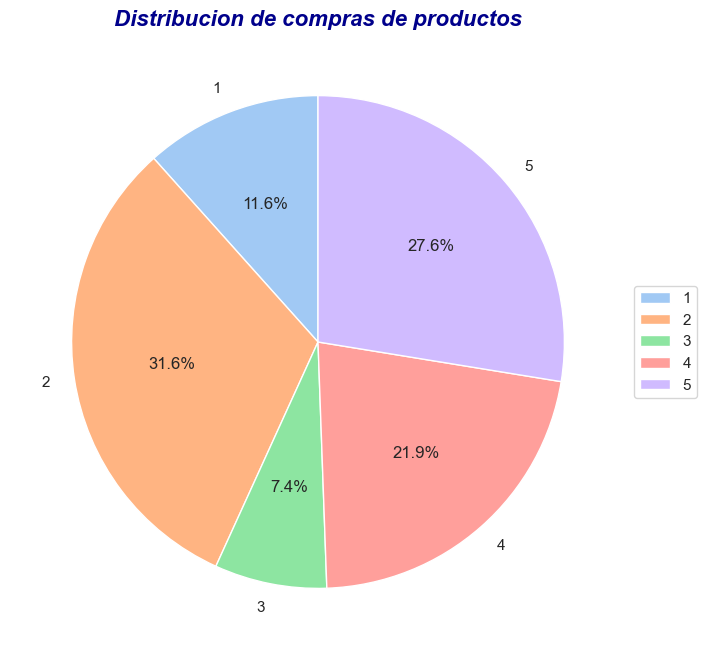

In [24]:
data_comprado = data_compras[data_compras["incidencia_compra"]==1]
data_comprado = data_comprado.groupby(["id_marca"])["cantidad"].sum().reset_index()
# Set Seaborn style
sns.set(style="whitegrid")
sizes = data_comprado["cantidad"].values
categories = data_comprado["id_marca"].values
# Plot the pie chart
plt.figure(figsize=(8, 8))
pie_chart = plt.pie(sizes, labels=categories, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribucion de compras de productos', fontsize=16, fontweight='bold', style='italic', color='darkblue')
plt.legend(pie_chart[0], categories, loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


Text(0.5, 1.0, 'Histograma de edad')

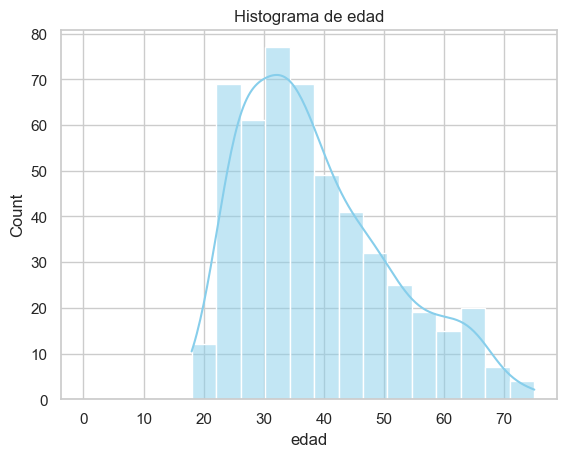

In [25]:
plt.plot(2, 2, 2)
sns.histplot(data_blind_client['edad'], kde=True, color='skyblue')
plt.title('Histograma de edad')

Text(0.5, 1.0, 'Histograma de ingreso_anual')

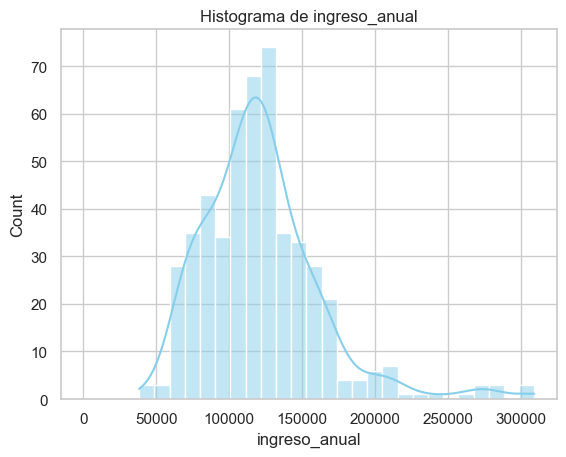

In [26]:
plt.plot(2, 2, 2)
sns.histplot(data_blind_client['ingreso_anual'], kde=True, color='skyblue')
plt.title('Histograma de ingreso_anual')

Text(0.5, 1.0, 'Histograma de total_dia_max')

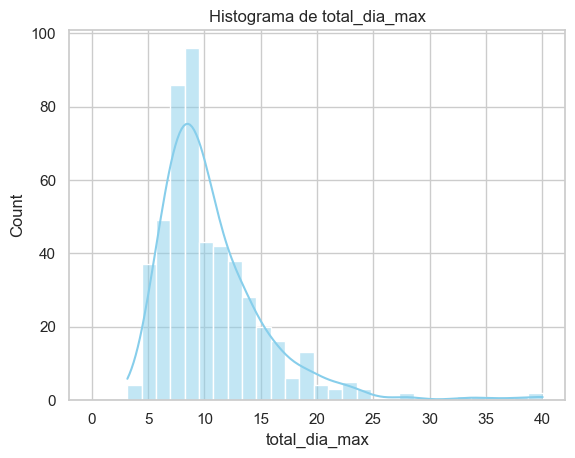

In [27]:
plt.plot(2, 2, 2)
sns.histplot(data_blind_client['total_dia_max'], kde=True, color='skyblue')
plt.title('Histograma de total_dia_max')

Text(0.5, 1.0, 'Histograma de total_dia_min')

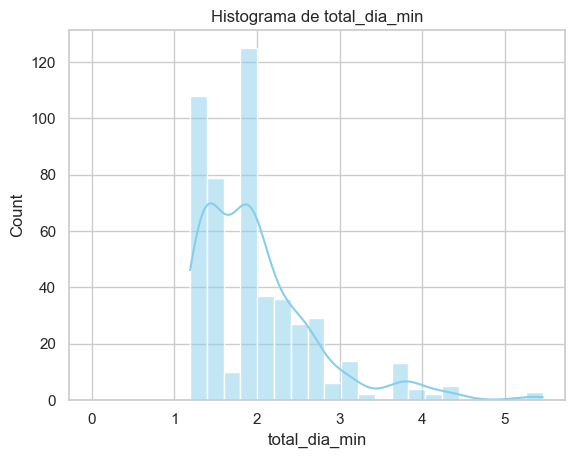

In [28]:
plt.plot(2, 2, 2)
sns.histplot(data_blind_client['total_dia_min'], kde=True, color='skyblue')
plt.title('Histograma de total_dia_min')

Text(0.5, 1.0, 'Histograma de total_historico')

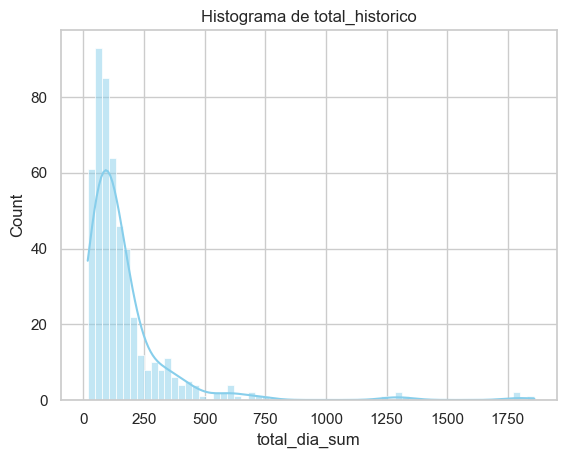

In [29]:
plt.plot(2, 2, 2)
sns.histplot(data_blind_client['total_dia_sum'], kde=True, color='skyblue')
plt.title('Histograma de total_historico')

Text(0.5, 1.0, 'Histograma de ratio de compras en promo')

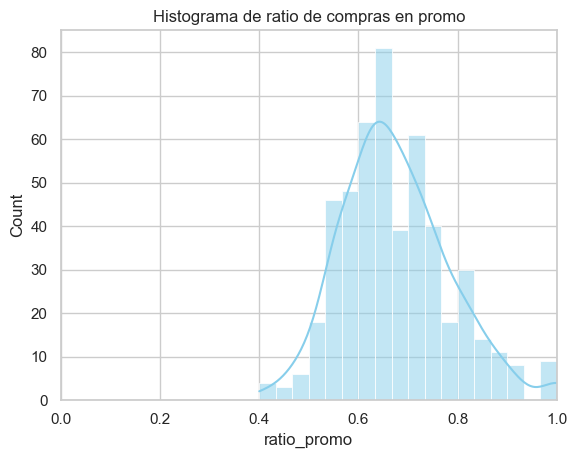

In [30]:
plt.plot(2, 2, 2)
sns.histplot(data_blind_client['ratio_promo'] ,
             kde=True, color='skyblue')
plt.xlim(0, 1)
plt.title('Histograma de ratio de compras en promo')

Text(0.5, 1.0, 'Histograma de dias_ult_compra_max')

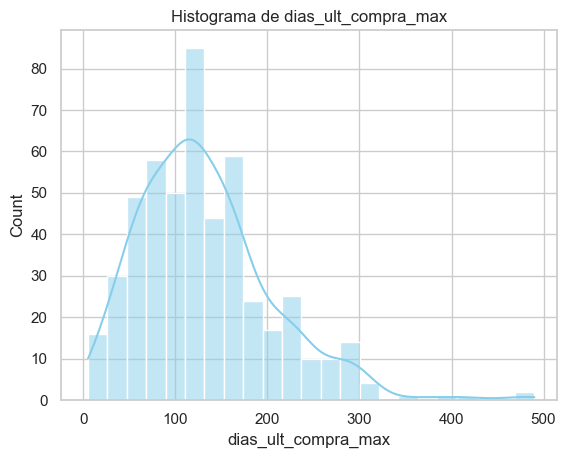

In [31]:
plt.plot(2, 2, 2)
sns.histplot(data_blind_client['dias_ult_compra_max'], kde=True, color='skyblue')
plt.title('Histograma de dias_ult_compra_max')

Text(0.5, 1.0, 'Histograma de dias desde ultima compra')

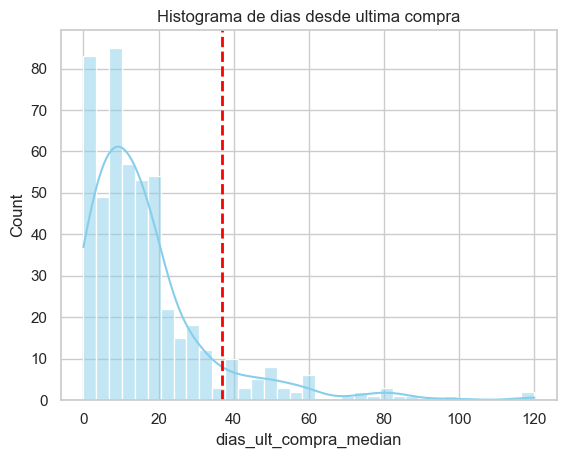

In [32]:
plt.plot(2, 2, 2)
sns.histplot(data_blind_client['dias_ult_compra_median'], kde=True, color='skyblue')
percentile_80 = data_blind_client['dias_ult_compra_median'].quantile(0.9)
plt.axvline(percentile_80, color='red', linestyle='dashed', linewidth=2, label='80th Percentile')
plt.title('Histograma de dias desde ultima compra')

Text(0.5, 1.0, 'Histograma de dias desde ultima compra con promocion')

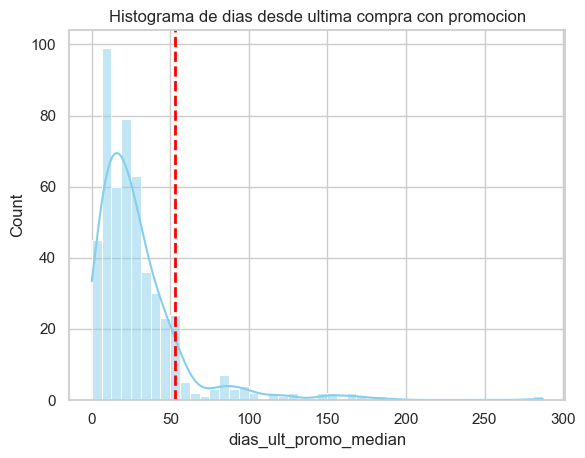

In [33]:
plt.plot(2, 2, 2)
sns.histplot(data_blind_client['dias_ult_promo_median'], kde=True, color='skyblue')
percentile_80 = data_blind_client['dias_ult_promo_median'].quantile(0.9)
plt.axvline(percentile_80, color='red', linestyle='dashed', linewidth=2, label='80th Percentile')
plt.title('Histograma de dias desde ultima compra con promocion')

Text(0.5, 1.0, 'Histograma de dias desde la ultima compra precio completo')

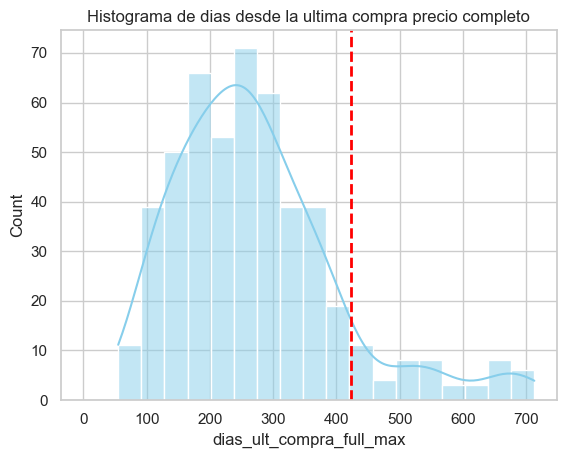

In [34]:
plt.plot(2, 2, 2)
sns.histplot(data_blind_client['dias_ult_compra_full_max'], kde=True, color='skyblue')
percentile_80 = data_blind_client['dias_ult_compra_full_max'].quantile(0.9)
plt.axvline(percentile_80, color='red', linestyle='dashed', linewidth=2, label='80th Percentile')
plt.title('Histograma de dias desde la ultima compra precio completo')

Text(0.5, 1.0, 'Histograma de dias desde la ultima compra precio completo')

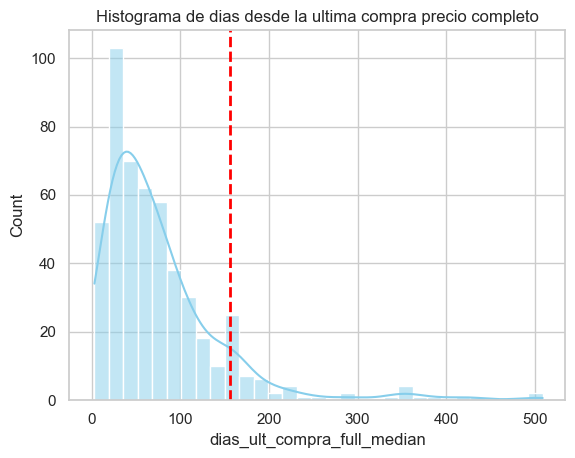

In [35]:
plt.plot(2, 2, 2)
sns.histplot(data_blind_client['dias_ult_compra_full_median'], kde=True, color='skyblue')
percentile_80 = data_blind_client['dias_ult_compra_full_median'].quantile(0.9)
plt.axvline(percentile_80, color='red', linestyle='dashed', linewidth=2, label='80th Percentile')
plt.title('Histograma de dias desde la ultima compra precio completo')

Text(0.5, 1.0, 'Histograma de dias desde la ultima compra')

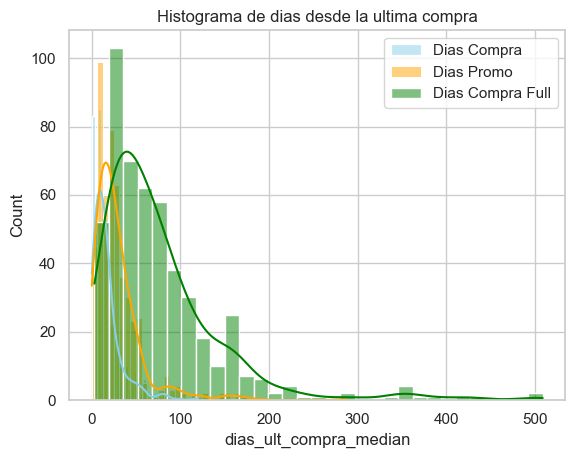

In [36]:
plt.plot(2, 2, 2)
sns.histplot(data_blind_client['dias_ult_compra_median'], kde=True, color='skyblue',label="Dias Compra")
sns.histplot(data_blind_client['dias_ult_promo_median'], kde=True, color='orange', label="Dias Promo")
sns.histplot(data_blind_client['dias_ult_compra_full_median'], kde=True, color='green', label = "Dias Compra Full")
plt.legend()
plt.title('Histograma de dias desde la ultima compra')

Text(0.5, 1.0, 'Diagrama de barras de genero')

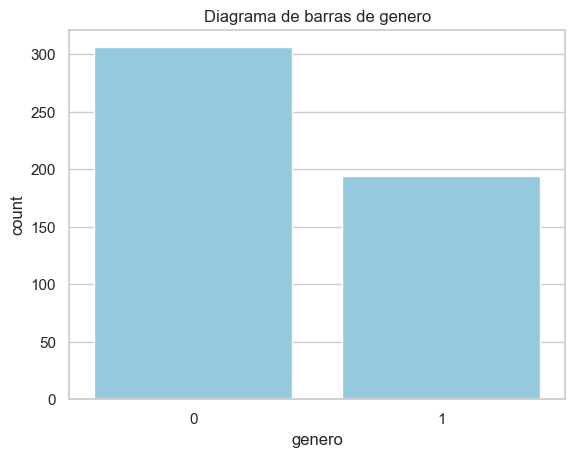

In [37]:
plt.plot(2, 2, 2)
sns.barplot(x=data_blind_client['genero'].value_counts().index, y=data_blind_client['genero'].value_counts(), color='skyblue')
plt.title('Diagrama de barras de genero')

Text(0.5, 1.0, 'Diagrama de barras de nivel_educacion')

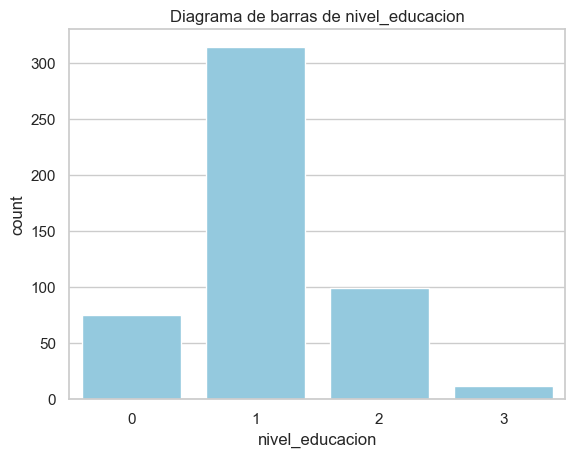

In [38]:
plt.plot(2, 2, 2)
sns.barplot(x=data_blind_client['nivel_educacion'].value_counts().index, y=data_blind_client['nivel_educacion'].value_counts(), color='skyblue')
plt.title('Diagrama de barras de nivel_educacion')

Text(0.5, 1.0, 'Diagrama de barras del producto preferido por persona')

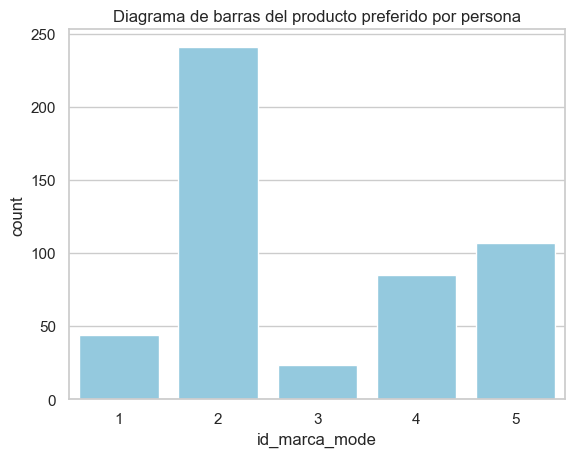

In [39]:
plt.plot(2, 2, 2)
sns.barplot(x=data_blind_client['id_marca_mode'].value_counts().index, y=data_blind_client['id_marca_mode'].value_counts(), color='skyblue')
plt.title('Diagrama de barras del producto preferido por persona')

Text(0.5, 1.0, 'Diagrama de barras de id_marca_max_count')

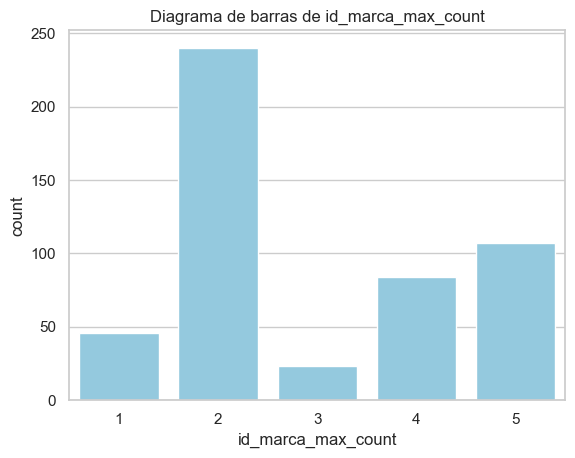

In [40]:
plt.plot(2, 2, 2)
sns.barplot(x=data_blind_client['id_marca_max_count'].value_counts().index, y=data_blind_client['id_marca_max_count'].value_counts(), color='skyblue')
plt.title('Diagrama de barras de id_marca_max_count')

Text(0.5, 1.0, 'Histograma de precio_compra_median')

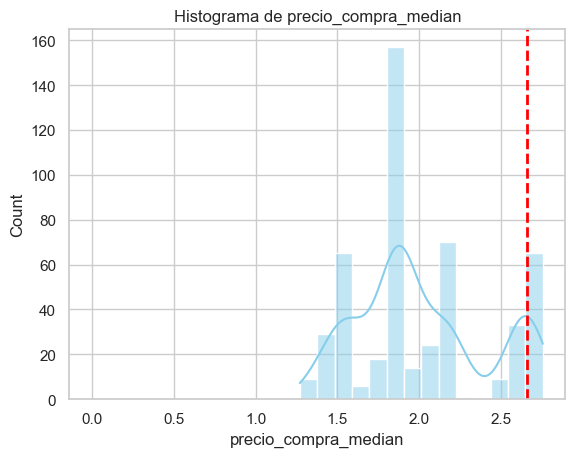

In [41]:
plt.plot(2, 2, 2)
sns.histplot(data_blind_client['precio_compra_median'], kde=True, color='skyblue')
percentile_80 = data_blind_client['precio_compra_median'].quantile(0.9)
plt.axvline(percentile_80, color='red', linestyle='dashed', linewidth=2, label='80th Percentile')
plt.title('Histograma de precio_compra_median')

Text(0.5, 1.0, 'Histograma de precio_compra_max')

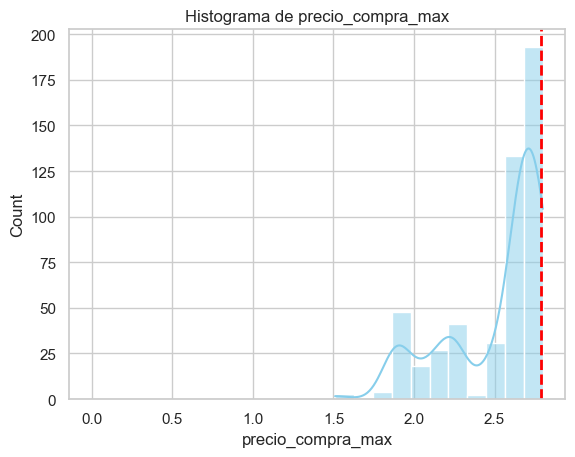

In [42]:
plt.plot(2, 2, 2)
sns.histplot(data_blind_client['precio_compra_max'], kde=True, color='skyblue')
percentile_80 = data_blind_client['precio_compra_max'].quantile(0.9)
plt.axvline(percentile_80, color='red', linestyle='dashed', linewidth=2, label='80th Percentile')
plt.title('Histograma de precio_compra_max')

Text(0.5, 1.0, 'Histograma de precio_compra_min')

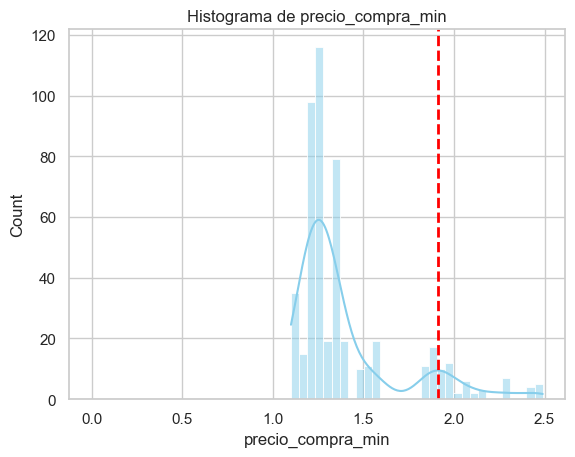

In [43]:
plt.plot(2, 2, 2)
sns.histplot(data_blind_client['precio_compra_min'], kde=True, color='skyblue')
percentile_80 = data_blind_client['precio_compra_min'].quantile(0.9)
plt.axvline(percentile_80, color='red', linestyle='dashed', linewidth=2, label='80th Percentile')
plt.title('Histograma de precio_compra_min')

In [44]:
cat_columns

['genero', 'estado_civil', 'nivel_educacion', 'ocupacion', 'id_marca_mode']

In [45]:
num_columns = ['edad',
 'ingreso_anual',
 'total_dia_max',
 'total_dia_min',
 'total_dia_median',
 'total_dia_sum',
 'incidencia_compra_sum',
 'compra_promo_sum',
 'dias_ult_visita_max',
 'dias_ult_visita_median',
 'dias_ult_compra_max',
 'dias_ult_compra_median',
 'dias_ult_promo_max',
 'dias_ult_promo_median',
 'dias_ult_compra_full_max',
 'dias_ult_compra_full_median',
 'precio_compra_max',
 'precio_compra_min',
 'precio_compra_median',
 'ratio_promo']

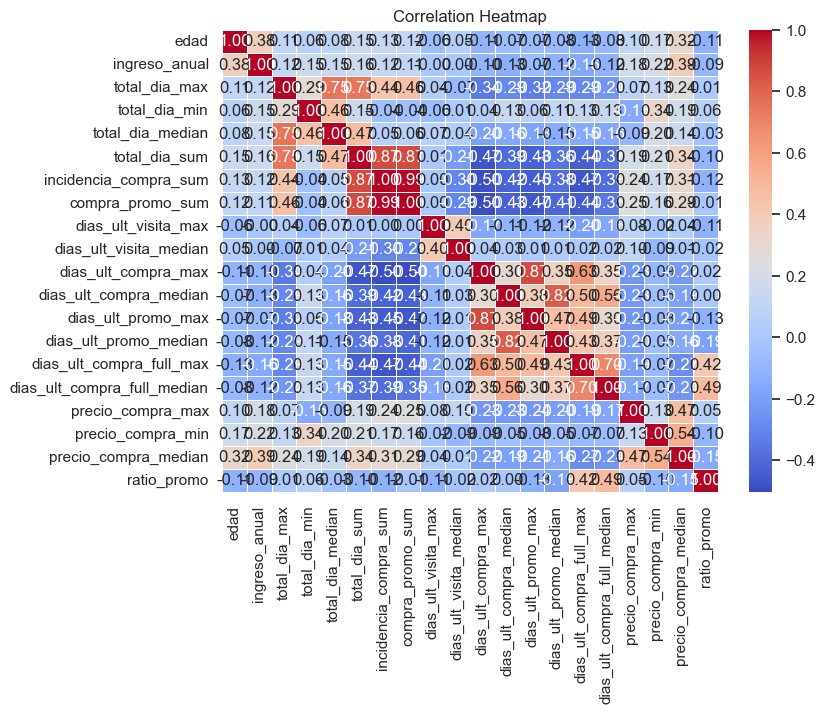

In [46]:
correlation_matrix = data_blind_client[num_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [47]:
last_num_columns = ['edad',
 'ingreso_anual',
 'total_dia_min',
 'total_dia_median',
 'total_dia_sum',
 'dias_ult_visita_max',
 'dias_ult_visita_median',
 'dias_ult_compra_max',
 'dias_ult_compra_median',
 'dias_ult_promo_median',
 'dias_ult_compra_full_max',
 'dias_ult_compra_full_median',
 'precio_compra_max',
 'precio_compra_min',
 'precio_compra_median',
 'ratio_promo']

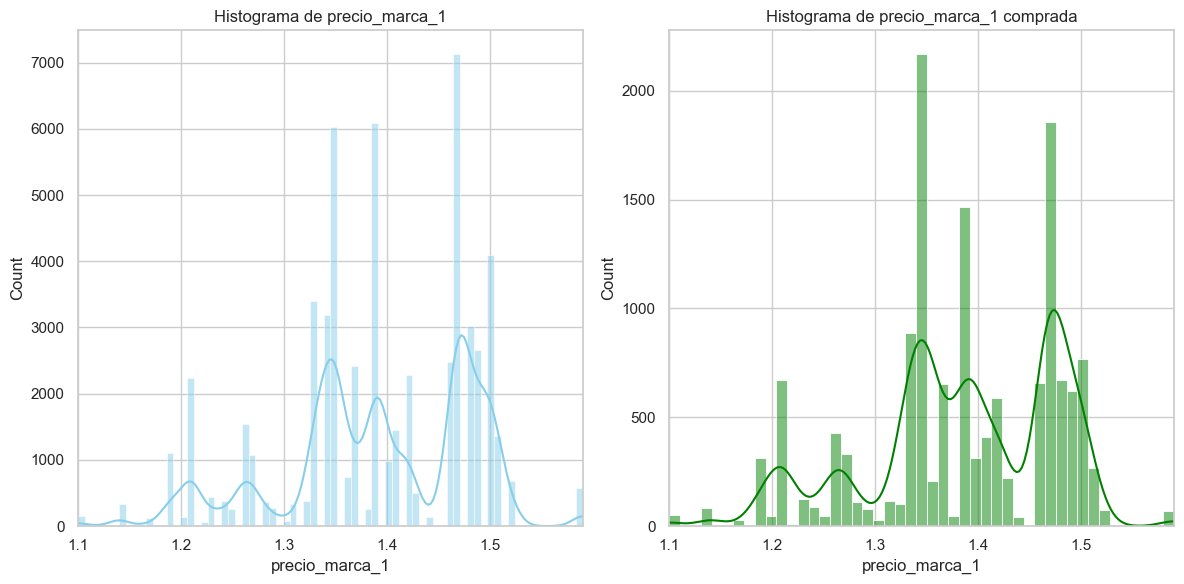

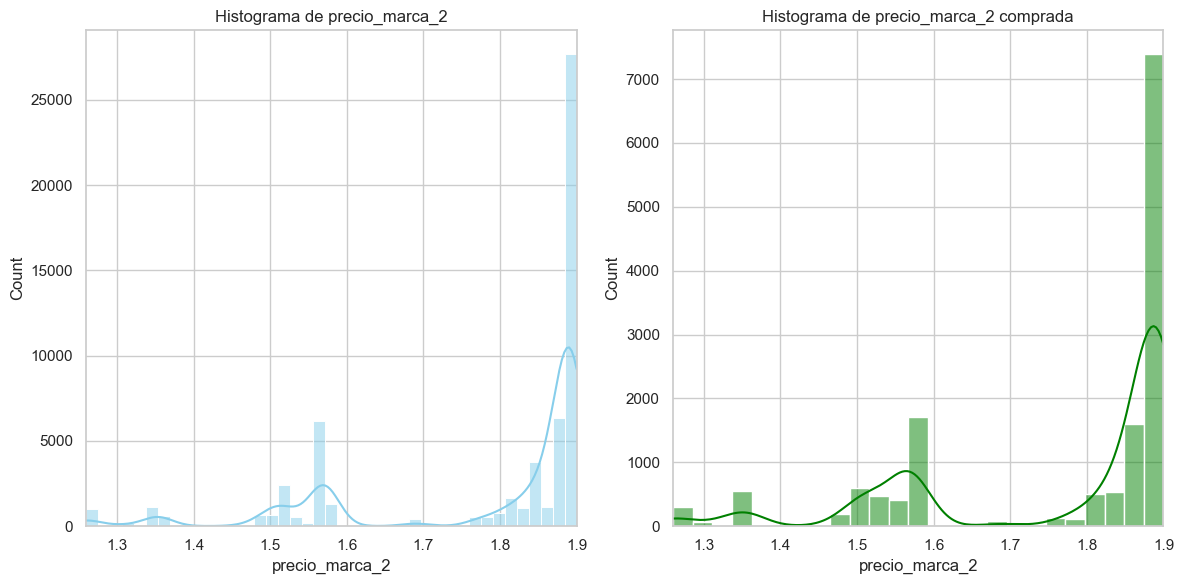

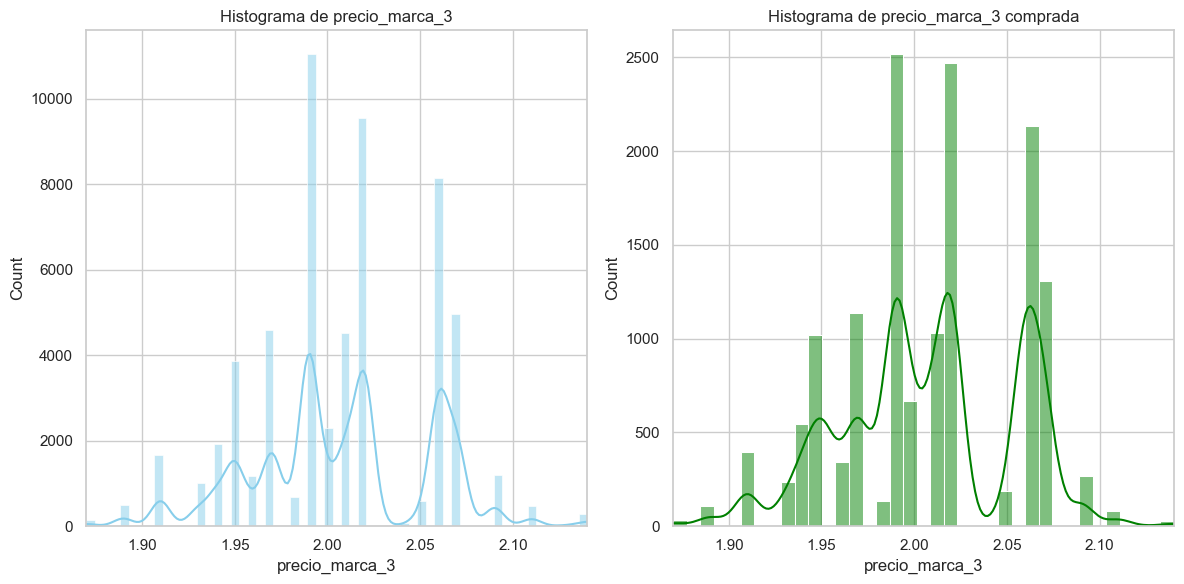

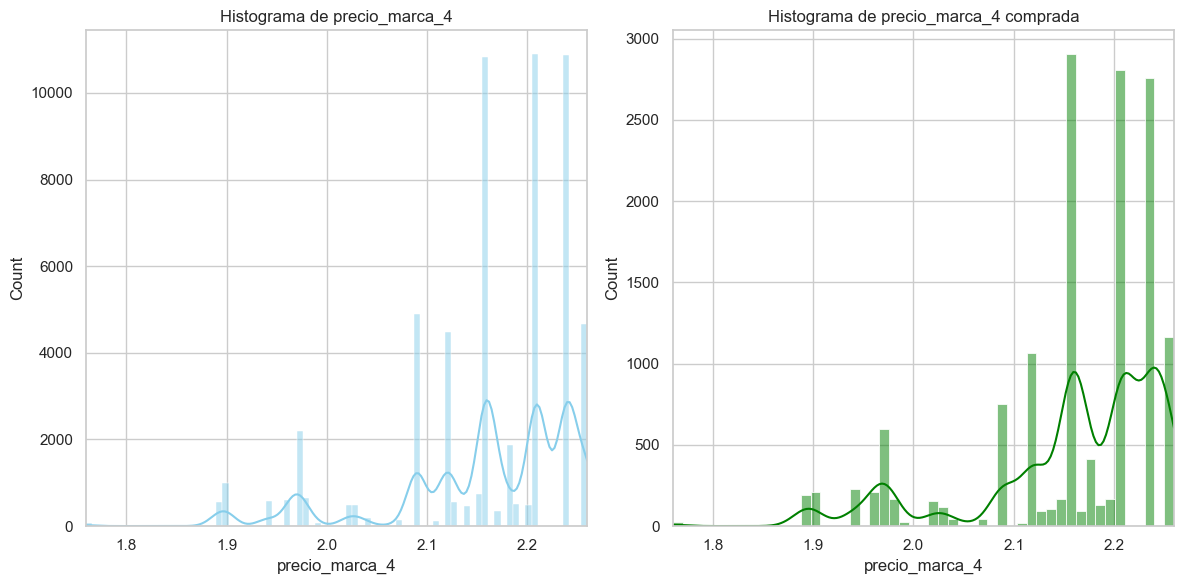

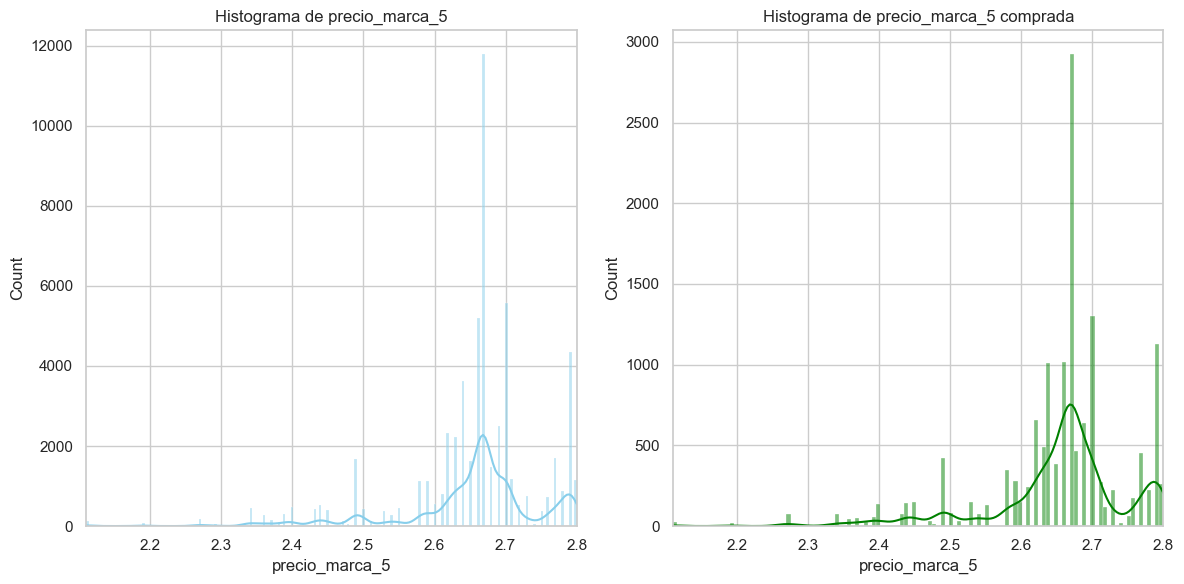

In [48]:
for i in range (1,6):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data_compras[f'precio_marca_{i}'], kde=True, color='skyblue')
    plt.xlim(data_compras[f'precio_marca_{i}'].min(), data_compras[f'precio_marca_{i}'].max())
    plt.title(f'Histograma de precio_marca_{i}')

    plt.subplot(1, 2, 2)
    sns.histplot(data_compras.loc[(data_compras["incidencia_compra"]==1)][f'precio_marca_{i}'], kde=True, color='green')
    plt.xlim(data_compras[f'precio_marca_{i}'].min(), data_compras[f'precio_marca_{i}'].max())
    plt.title(f'Histograma de precio_marca_{i} comprada')
    plt.tight_layout()

In [49]:
data_cliente.columns

Index(['id', 'genero', 'estado_civil', 'edad', 'nivel_educacion',
       'ingreso_anual', 'ocupacion', 'tamanio_ciudad', 'total_dia_max',
       'total_dia_min', 'total_dia_mean', 'total_dia_median', 'total_dia_sum',
       'incidencia_compra_sum', 'compra_promo_sum', 'id_marca_mode',
       'dias_ult_visita_max', 'dias_ult_visita_min', 'dias_ult_visita_median',
       'dias_ult_visita_mean', 'dias_ult_compra_max', 'dias_ult_compra_median',
       'dias_ult_promo_max', 'dias_ult_promo_median',
       'dias_ult_compra_full_max', 'dias_ult_compra_full_median',
       'precio_compra_max', 'precio_compra_min', 'precio_compra_median',
       'id_marca_max_count', 'ratio_promo'],
      dtype='object')

In [50]:
data_blind_client.to_csv("cliente.csv")

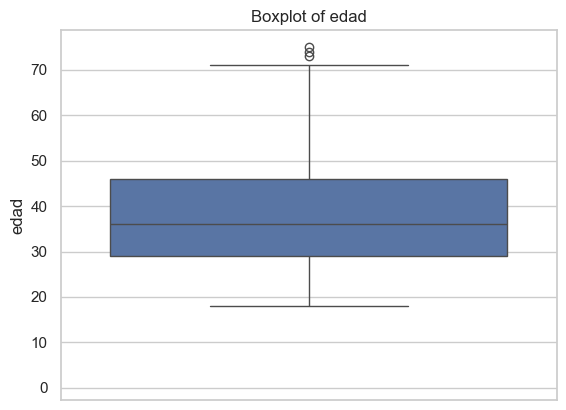

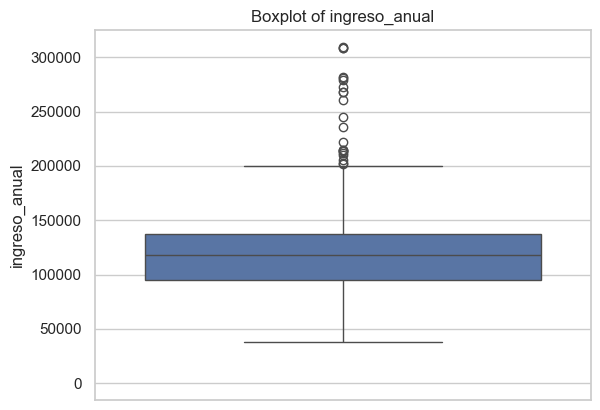

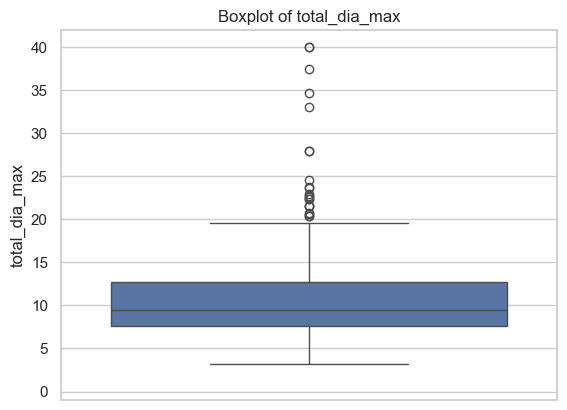

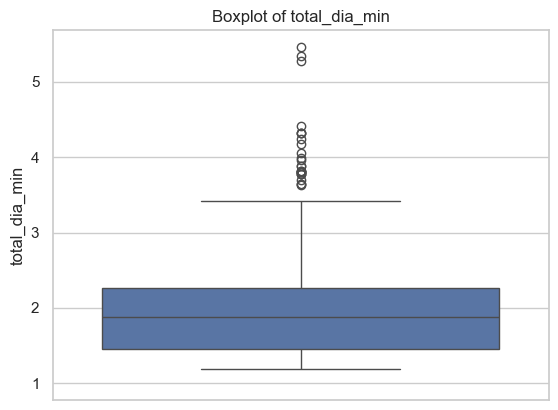

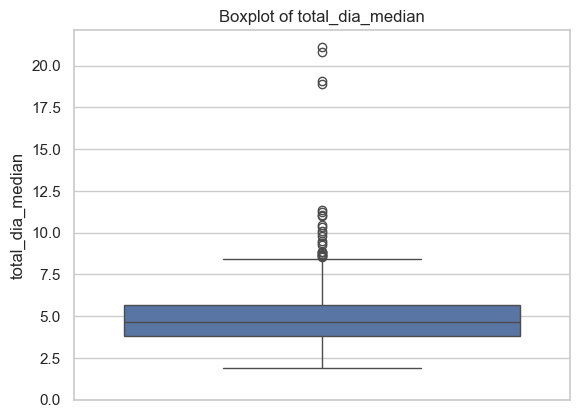

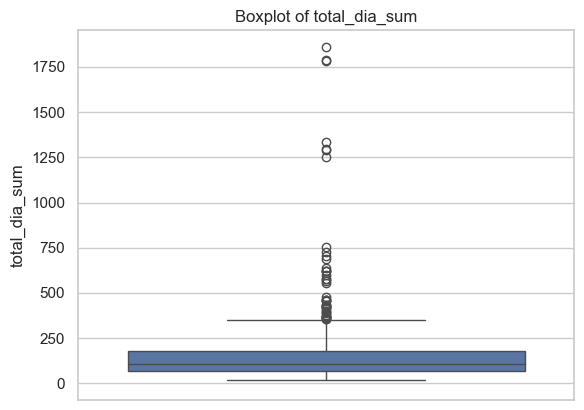

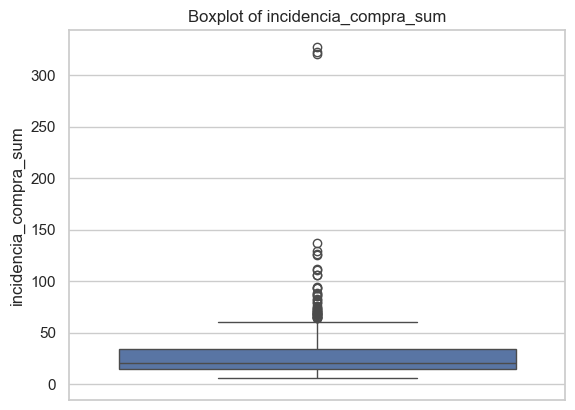

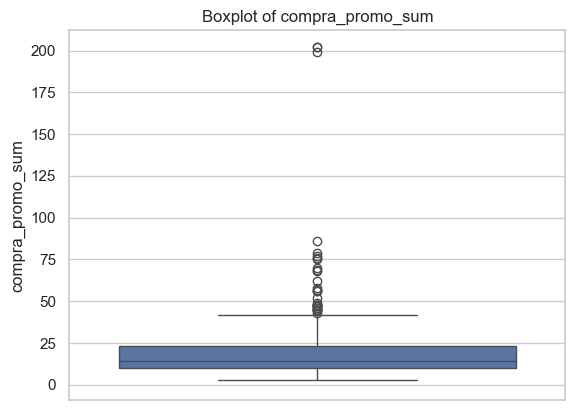

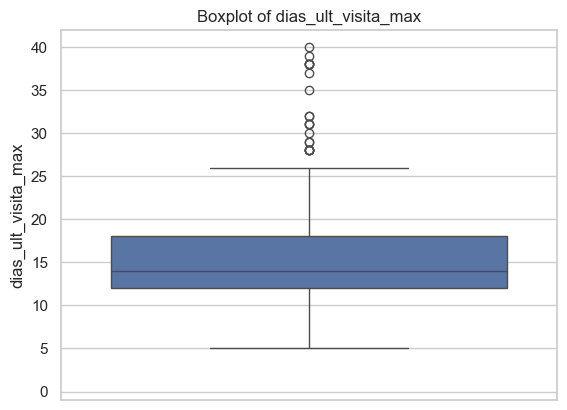

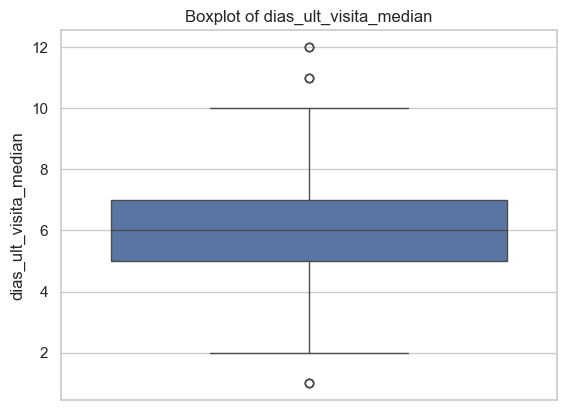

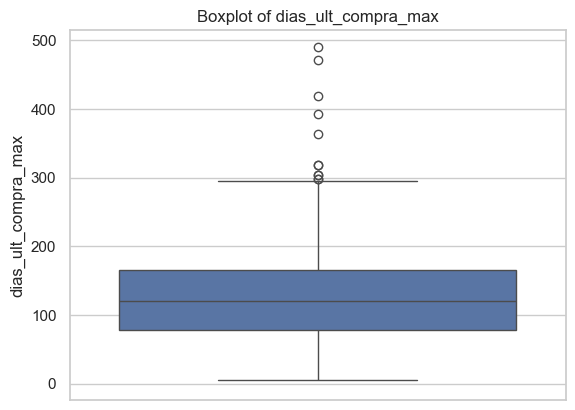

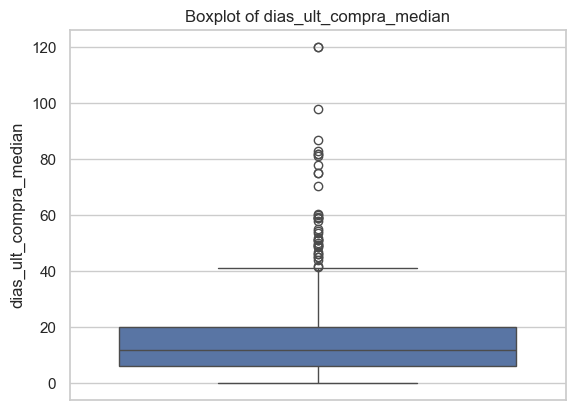

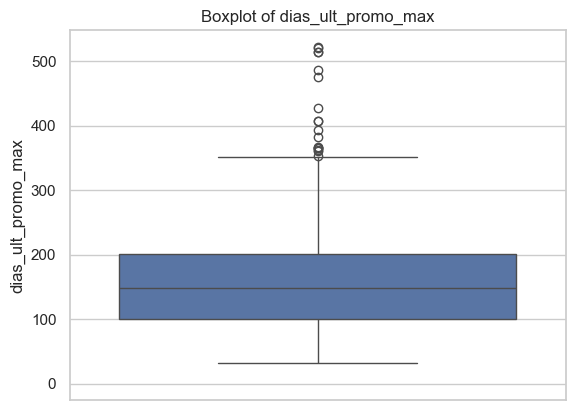

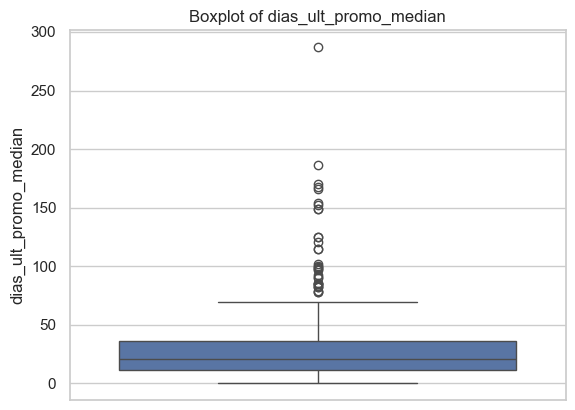

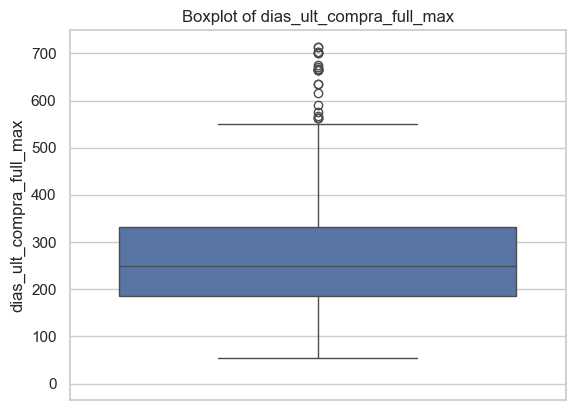

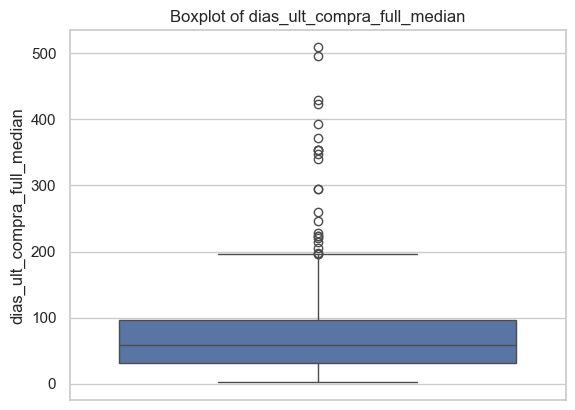

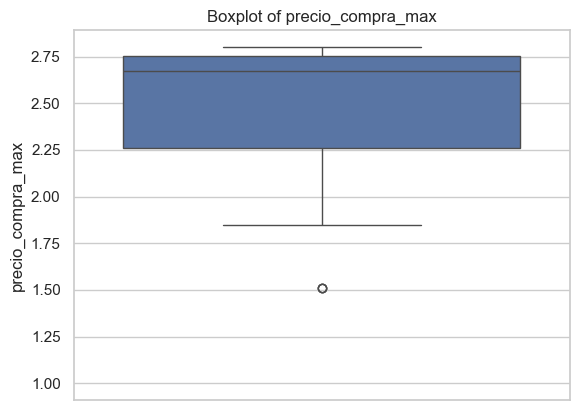

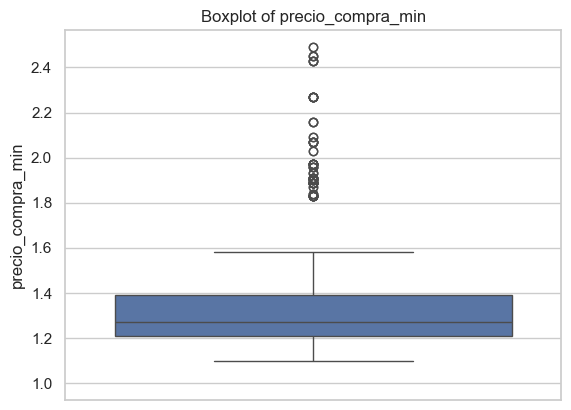

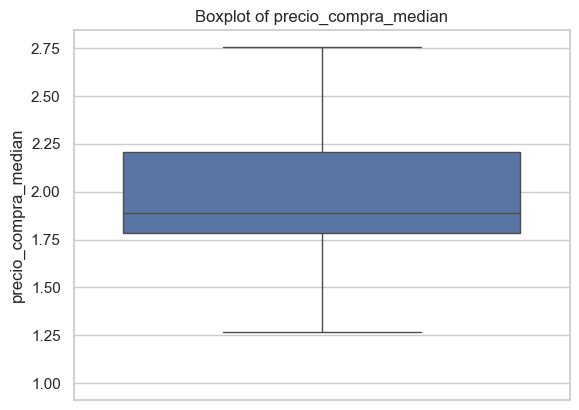

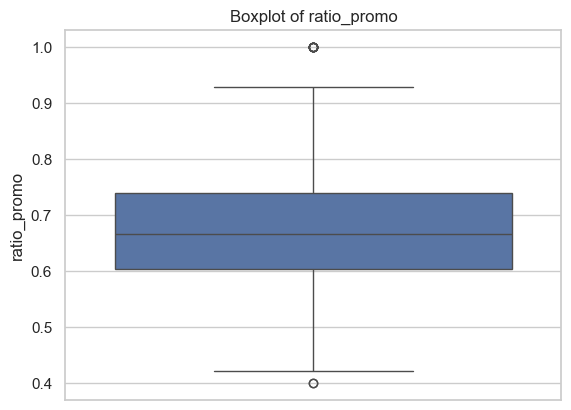

In [51]:
for column in num_columns:
    plt.plot(1, 1, 1)
    sns.boxplot(data_blind_client[column])

    # Set the title
    plt.title(f'Boxplot of {column}')

    # Show the plot
    plt.show()

In [52]:
num_columns

['edad',
 'ingreso_anual',
 'total_dia_max',
 'total_dia_min',
 'total_dia_median',
 'total_dia_sum',
 'incidencia_compra_sum',
 'compra_promo_sum',
 'dias_ult_visita_max',
 'dias_ult_visita_median',
 'dias_ult_compra_max',
 'dias_ult_compra_median',
 'dias_ult_promo_max',
 'dias_ult_promo_median',
 'dias_ult_compra_full_max',
 'dias_ult_compra_full_median',
 'precio_compra_max',
 'precio_compra_min',
 'precio_compra_median',
 'ratio_promo']

In [53]:
data_blind_client[last_num_columns].describe()

,edad,ingreso_anual,total_dia_min,total_dia_median,total_dia_sum,dias_ult_visita_max,dias_ult_visita_median,dias_ult_compra_max,dias_ult_compra_median,dias_ult_promo_median,dias_ult_compra_full_max,dias_ult_compra_full_median,precio_compra_max,precio_compra_min,precio_compra_median,ratio_promo
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,38.676000,121520.162000,1.991960,5.060930,165.513160,15.436000,5.971000,132.036000,16.485000,29.090000,270.232000,76.539000,2.517740,1.398440,2.009910,0.674216
std,12.191977,41061.953449,0.705916,2.176784,204.892234,5.552979,1.533415,72.890443,17.108995,29.680275,129.773219,70.026419,0.307848,0.300123,0.392097,0.109018
min,18.000000,38247.000000,1.190000,1.860000,17.750000,5.000000,1.000000,5.000000,0.000000,0.000000,55.000000,3.000000,1.510000,1.100000,1.270000,0.400000
25%,29.000000,95040.000000,1.460000,3.780000,66.380000,12.000000,5.000000,79.000000,6.000000,10.875000,184.750000,31.000000,2.260000,1.210000,1.785000,0.603947
50%,36.000000,117804.500000,1.880000,4.620000,107.600000,14.000000,6.000000,120.000000,12.000000,21.000000,249.000000,59.000000,2.670000,1.270000,1.890000,0.666667
75%,46.000000,137190.750000,2.270000,5.673750,181.540000,18.000000,7.000000,166.000000,20.000000,36.000000,331.250000,97.000000,2.752500,1.390000,2.210000,0.739130
max,75.000000,309364.000000,5.460000,21.120000,1859.200000,40.000000,12.000000,490.000000,120.000000,287.000000,713.000000,509.000000,2.800000,2.490000,2.755000,1.000000


In [54]:
data_blind_client[last_num_columns].skew()

edad                           0.753536
ingreso_anual                  1.440643
total_dia_min                  1.693008
total_dia_median               3.006499
total_dia_sum                  4.839249
dias_ult_visita_max            1.559270
dias_ult_visita_median         0.338290
dias_ult_compra_max            1.087162
dias_ult_compra_median         2.435095
dias_ult_promo_median          3.342540
dias_ult_compra_full_max       1.173836
dias_ult_compra_full_median    2.668597
precio_compra_max             -1.104822
precio_compra_min              1.788668
precio_compra_median           0.426028
ratio_promo                    0.503635
dtype: float64

In [55]:
data_blind_client[last_num_columns].kurt()

edad                           -0.168377
ingreso_anual                   3.890462
total_dia_min                   3.767469
total_dia_median               16.844263
total_dia_sum                  30.700444
dias_ult_visita_max             3.504546
dias_ult_visita_median          1.855630
dias_ult_compra_max             2.161083
dias_ult_compra_median          8.254807
dias_ult_promo_median          17.145417
dias_ult_compra_full_max        1.687504
dias_ult_compra_full_median    10.033095
precio_compra_max              -0.036478
precio_compra_min               2.457816
precio_compra_median           -0.838756
ratio_promo                     0.410232
dtype: float64

In [56]:
columns_for_standard = ["dias_ult_visita_median"]
columns_for_normalize = ["edad"]
columns_for_robust = [
    'ingreso_anual',
    'total_dia_min',
    'total_dia_median',
    'total_dia_sum',
    'dias_ult_visita_max',
    'dias_ult_visita_min',
    'dias_ult_compra_max',
    'dias_ult_compra_median',
    'dias_ult_promo_max',
    'dias_ult_promo_median',
    'dias_ult_compra_full_max',
    'dias_ult_compra_full_median']
columns_for_impute_only = ["ratio_promo"]
data_blind_scaled = data_blind_client.copy()

# Clusterización

- En esta sección debe aplicar técnicas de clusterización para segmentar a los clientes según sus características y comportamientos
- También puede incluir gráficas para visualizar los segmentos o el proceso

### Preprocess

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [58]:
client_categorical_columns = ["genero","estado_civil","nivel_educacion","ocupacion","tamanio_ciudad",]
client_product_categorical_columns = ["id_marca_mode",]

In [59]:
base_categorical = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='most_frequent'))
    ]
)
base_categorical

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

In [60]:
base_numerical_imputer = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='median'))
    ]
)
base_numerical_standard = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='median')),
        ("standard", StandardScaler()),
    ]
)
base_numerical_normalize = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='median')),
        ("normalize", MinMaxScaler()),
    ]
)
base_numerical_robust = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='median')),
        ("robust", RobustScaler()),
    ]
)

In [61]:
preprocess = ColumnTransformer(
    transformers=[
        ("impute",base_numerical_imputer,columns_for_impute_only),
        ("standard_num",base_numerical_standard,columns_for_standard),
        ("normalize_num",base_numerical_normalize,columns_for_normalize),
        ("robust_num",base_numerical_robust,columns_for_robust),
        ("cat",base_categorical,cat_columns),
    ]
)
preprocess

ColumnTransformer(transformers=[('impute',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['ratio_promo']),
                                ('standard_num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standard',
                                                  StandardScaler())]),
                                 ['dias_ult_visita_median']),
                                ('normalize_num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('normalize',...
                                  'total_dia_median', 'total_dia_sum',
                                  'dias_ult_visita_max', 'dias_ult_visita_min',
                                  'dias_ult_compra_max',
                                  'dias_ult_compra_median',
                                  'dias_ult_promo_max', 'dias_ult_promo_median',
                                  'dias_ult_compra_full_max',
                                  'dias_ult_compra_full_median']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['genero', 'estado_civil', 'nivel_educacion',
                                  'ocupacion', 'id_marca_mode'])])

In [62]:
p_preprocess = Pipeline(
        steps=[
            ("preprocess", preprocess),
        ]
    )
p_preprocess

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('impute',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['ratio_promo']),
                                                 ('standard_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard',
                                                                   StandardScaler())]),
                                                  ['dias_ult_visita_median']),
                                                 ('normalize_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(str...
                                                   'total_dia_sum',
                                                   'dias_ult_visita_max',
                                                   'dias_ult_visita_min',
                                                   'dias_ult_compra_max',
                                                   'dias_ult_compra_median',
                                                   'dias_ult_promo_max',
                                                   'dias_ult_promo_median',
                                                   'dias_ult_compra_full_max',
                                                   'dias_ult_compra_full_median']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['genero', 'estado_civil',
                                                   'nivel_educacion',
                                                   'ocupacion',
                                                   'id_marca_mode'])]))])

In [63]:
p_preprocess.fit_transform(data_blind_scaled).shape

(500, 20)

In [64]:
data_blind_scaled[columns_for_impute_only + columns_for_standard + columns_for_normalize + columns_for_robust + cat_columns] = preprocess.fit_transform(data_blind_scaled)
data_blind_scaled

,genero,estado_civil,edad,nivel_educacion,ingreso_anual,ocupacion,tamanio_ciudad,total_dia_max,total_dia_min,total_dia_mean,...,dias_ult_compra_median,dias_ult_promo_max,dias_ult_promo_median,dias_ult_compra_full_max,dias_ult_compra_full_median,precio_compra_max,precio_compra_min,precio_compra_median,id_marca_max_count,ratio_promo
0,0.0,0.0,0.508772,1.0,-0.164612,1.0,0,5.70,0.345679,3.773333,...,1.571429,0.691358,1.194030,2.839590,1.318182,2.79,1.47,1.900,2,0.888889
1,1.0,1.0,0.596491,2.0,0.978571,2.0,1,6.63,0.185185,3.794545,...,0.357143,0.414815,0.358209,0.156997,0.454545,2.26,1.57,2.210,4,0.636364
2,0.0,0.0,0.175439,0.0,-0.108954,1.0,0,5.61,-0.456790,3.227000,...,-0.678571,2.765432,-0.218905,1.665529,-0.765152,2.49,1.26,1.835,2,0.400000
3,0.0,0.0,0.333333,1.0,0.042645,0.0,0,5.58,-0.382716,2.996364,...,-0.214286,0.602469,1.353234,0.245734,1.560606,2.80,1.57,2.620,5,0.636364
4,0.0,0.0,0.543860,1.0,0.086867,1.0,2,7.47,0.876543,4.228462,...,1.071429,0.197531,1.194030,0.000000,0.424242,2.79,2.49,2.630,5,0.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,1.0,0.140351,1.0,-1.109909,0.0,0,9.45,0.012346,4.526500,...,0.464286,-0.681481,0.139303,-0.430034,0.621212,2.72,1.27,1.890,2,0.750000
496,0.0,0.0,0.736842,2.0,-0.674496,0.0,0,23.01,0.012346,10.704884,...,-0.785714,-0.246914,-0.398010,0.266212,-0.621212,2.70,1.19,1.890,2,0.627907
497,1.0,1.0,0.192982,1.0,-0.071659,1.0,0,10.05,0.000000,5.632051,...,-0.571429,0.513580,-0.517413,-0.689420,-0.560606,2.07,1.10,1.890,2,0.615385
498,1.0,0.0,0.298246,1.0,-1.056648,0.0,0,9.15,0.913580,5.091935,...,0.214286,-0.760494,0.000000,-0.750853,-0.166667,2.67,1.26,1.570,2,0.677419


### clustering

In [65]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from gap_statistic import OptimalK

In [66]:
p_preprocess["preprocess"].feature_names_in_

array(['genero', 'estado_civil', 'edad', 'nivel_educacion',
       'ingreso_anual', 'ocupacion', 'tamanio_ciudad', 'total_dia_max',
       'total_dia_min', 'total_dia_mean', 'total_dia_median',
       'total_dia_sum', 'incidencia_compra_sum', 'compra_promo_sum',
       'id_marca_mode', 'dias_ult_visita_max', 'dias_ult_visita_min',
       'dias_ult_visita_median', 'dias_ult_visita_mean',
       'dias_ult_compra_max', 'dias_ult_compra_median',
       'dias_ult_promo_max', 'dias_ult_promo_median',
       'dias_ult_compra_full_max', 'dias_ult_compra_full_median',
       'precio_compra_max', 'precio_compra_min', 'precio_compra_median',
       'id_marca_max_count', 'ratio_promo'], dtype=object)

In [67]:
cluster_columns = last_num_columns
cluster_columns

['edad',
 'ingreso_anual',
 'total_dia_min',
 'total_dia_median',
 'total_dia_sum',
 'dias_ult_visita_max',
 'dias_ult_visita_median',
 'dias_ult_compra_max',
 'dias_ult_compra_median',
 'dias_ult_promo_median',
 'dias_ult_compra_full_max',
 'dias_ult_compra_full_median',
 'precio_compra_max',
 'precio_compra_min',
 'precio_compra_median',
 'ratio_promo']

In [68]:
data_blind_scaled = data_blind_scaled[cluster_columns]

In [69]:
tsne = TSNE(n_components=2, random_state=42, perplexity=70)

In [70]:
tsne_results = tsne.fit_transform(data_blind_scaled)

In [71]:
distortions = []
silhouette_scores = []
cluster_range = range(2,15)
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(data_blind_scaled[cluster_columns])
    distortions.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_blind_scaled, clusters)
    silhouette_scores.append(silhouette_avg)


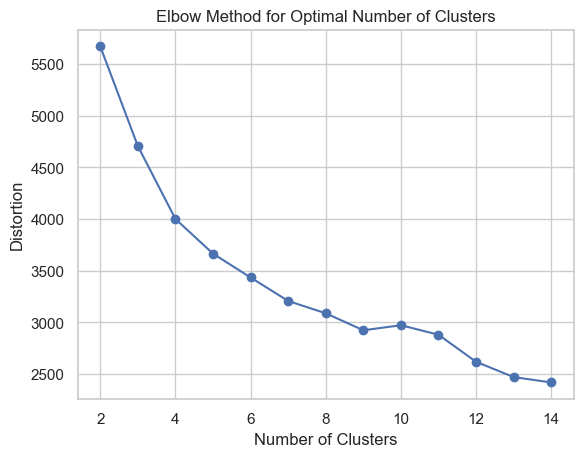

In [72]:
plt.plot(cluster_range, distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

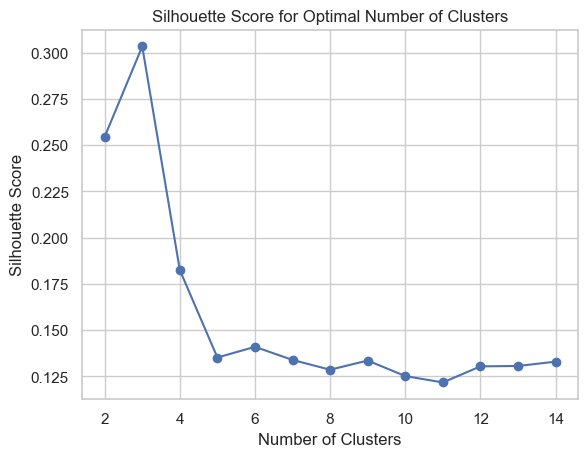

In [73]:
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

In [74]:
optimal_k = OptimalK(parallel_backend='joblib')
n_clusters = optimal_k(data_blind_scaled[cluster_columns], cluster_array=np.array(cluster_range))
n_clusters

12

In [75]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_blind_scaled[cluster_columns])

<Axes: >

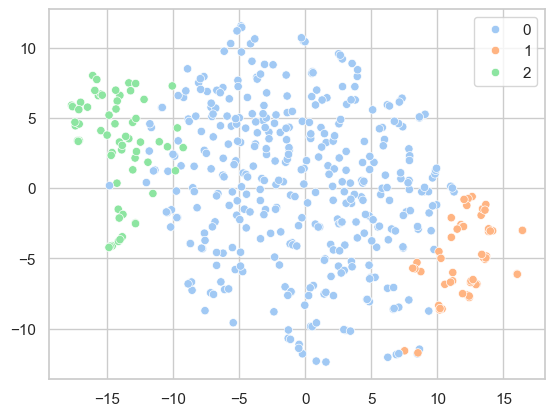

In [76]:
sns.scatterplot(x=tsne_results[:,0],y=tsne_results[:,1],hue=clusters,palette="pastel")

In [77]:
data_blind_client["cluster"] = clusters

In [78]:
data_blind_client[last_num_columns+["cluster"]].groupby(["cluster"]).count()

,edad,ingreso_anual,total_dia_min,total_dia_median,total_dia_sum,dias_ult_visita_max,dias_ult_visita_median,dias_ult_compra_max,dias_ult_compra_median,dias_ult_promo_median,dias_ult_compra_full_max,dias_ult_compra_full_median,precio_compra_max,precio_compra_min,precio_compra_median,ratio_promo
cluster,,,,,,,,,,,,,,,,
0,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
1,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
2,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62


In [79]:
data_blind_client[last_num_columns+["cluster"]].groupby(["cluster"]).mean()

,edad,ingreso_anual,total_dia_min,total_dia_median,total_dia_sum,dias_ult_visita_max,dias_ult_visita_median,dias_ult_compra_max,dias_ult_compra_median,dias_ult_promo_median,dias_ult_compra_full_max,dias_ult_compra_full_median,precio_compra_max,precio_compra_min,precio_compra_median,ratio_promo
cluster,,,,,,,,,,,,,,,,
0,38.065274,119249.913838,1.904543,4.771136,124.970836,15.720627,6.112272,134.574413,13.066580,23.699739,258.986945,66.844648,2.521593,1.377702,1.979334,0.674607
1,44.036364,140548.690909,2.289091,7.996364,585.345273,15.563636,5.190909,53.909091,2.672727,7.909091,138.218182,19.836364,2.601091,1.557818,2.336091,0.636068
2,37.693548,118664.290323,2.268387,4.247097,43.528387,13.564516,5.790323,185.661290,49.854839,81.177419,456.806452,186.725806,2.420000,1.385161,1.909435,0.705639


In [80]:
data_blind_client[cat_columns+["cluster"]].groupby(["cluster"]).agg(
    {
        "genero": [pd.Series.mode],
        "estado_civil": [pd.Series.mode],
        "nivel_educacion": [pd.Series.mode],
        "ocupacion": [pd.Series.mode],
        "id_marca_mode": [pd.Series.mode],
    }
)

,genero,estado_civil,nivel_educacion,ocupacion,id_marca_mode
,mode,mode,mode,mode,mode
cluster,,,,,
0,0,0,1,1,2
1,0,0,2,1,5
2,0,0,1,"[0, 1]",2


Vamos a usar 3 clusters de clientes
- **Publico Objetivo (0)**: Es el grupo mas grande de clientes. Son mas propensos a comprar algun producto cuando hay promociones, suelen comprar cada dos semanas y no visitan muy frecuentemente la tienda. Prefieren la marca 2.
- **Clientes VIP (1)**: Son un grupo muy reducido de clientes. Son el grupo con mayores ingresos anuales, son muy propensos a compra en montos muy altos, suelen visitar y comprar frecuentemente la tienda. Prefieren la marca 5, tienen un nivel de educacion 2.
- **Cliente Observador (2)**: Forman el segundo grupo mas pequeño. Tienden a tener los menores ingreso anuales, visitan bastante la tienda y compran productos muy raramente, pero sobretodo cuando hay promociones. Prefieren la marca 2.

# Modelado

- Finalmente, a partir de los nuevos segmentos de clientes aplica un modelo Estadístico o de Machine Learning aplicable a alguno de los siguientes casos de uso:

    -   Predicción de Precios
    -   Recomendación de Productos
    -   Análisis de Cesta de Compras
    -   Optimización de Precios
    -   Análisis de Elasticidad
    -   Análisis de Probabilidad de Compra

### Aumentando el dataset

In [81]:
add_cols = ['genero', 'estado_civil', 'nivel_educacion', 'ocupacion', 'id_marca_mode']
dataset_scaled = data_blind_scaled.merge(data_cliente["id"],left_index=True,right_index=True)
dataset_scaled = dataset_scaled.merge(data_blind_client[add_cols],left_index=True,right_index=True)
dataset_scaled["cluster"] = clusters
dataset_scaled

,edad,ingreso_anual,total_dia_min,total_dia_median,total_dia_sum,dias_ult_visita_max,dias_ult_visita_median,dias_ult_compra_max,dias_ult_compra_median,dias_ult_promo_median,...,precio_compra_min,precio_compra_median,ratio_promo,id,genero,estado_civil,nivel_educacion,ocupacion,id_marca_mode,cluster
0,0.508772,-0.164612,0.345679,-0.443564,-0.639458,0.333333,0.671723,1.126437,1.571429,1.194030,...,1.47,1.900,0.888889,200000001,0,0,1,1,2,2
1,0.596491,0.978571,0.185185,-0.200660,-0.571900,0.833333,0.018931,0.528736,0.357143,0.358209,...,1.57,2.210,0.636364,200000002,1,1,2,2,4,0
2,0.175439,-0.108954,-0.456790,-1.116832,-0.654133,0.166667,1.324516,3.436782,-0.678571,-0.218905,...,1.26,1.835,0.400000,200000003,0,0,0,1,2,0
3,0.333333,0.042645,-0.382716,-1.040264,-0.648142,0.000000,0.671723,0.885057,-0.214286,1.353234,...,1.57,2.620,0.636364,200000004,0,0,1,0,5,0
4,0.543860,0.086867,0.876543,0.190099,-0.457016,-0.333333,0.018931,-0.057471,1.071429,1.194030,...,2.49,2.630,0.615385,200000005,0,0,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.140351,-1.109909,0.012346,-0.253465,-0.148229,-0.333333,0.018931,-0.471264,0.464286,0.139303,...,1.27,1.890,0.750000,200000496,1,1,1,0,2,0
496,0.736842,-0.674496,0.012346,2.587459,3.062782,0.666667,-0.633861,-0.149425,-0.785714,-0.398010,...,1.19,1.890,0.627907,200000497,0,0,2,0,2,1
497,0.192982,-0.071659,0.000000,0.554455,0.972994,-0.666667,0.018931,0.321839,-0.571429,-0.517413,...,1.10,1.890,0.615385,200000498,1,1,1,1,2,0
498,0.298246,-1.056648,0.913580,0.047525,0.436349,-0.500000,0.671723,-0.712644,0.214286,0.000000,...,1.26,1.570,0.677419,200000499,1,0,1,0,2,0


In [82]:
product_columns = ['id', 'incidencia_compra', 'id_marca', 'cantidad',
       'ultima_marca_comprada', 'ultima_cantidad_comprada', 'precio_marca_1',
       'precio_marca_2', 'precio_marca_3', 'precio_marca_4', 'precio_marca_5',
       'promo_marca_1', 'promo_marca_2', 'promo_marca_3', 'promo_marca_4',
       'promo_marca_5','precio_compra', 'compra_promo']
data_compras[product_columns]

,id,incidencia_compra,id_marca,cantidad,ultima_marca_comprada,ultima_cantidad_comprada,precio_marca_1,precio_marca_2,precio_marca_3,precio_marca_4,precio_marca_5,promo_marca_1,promo_marca_2,promo_marca_3,promo_marca_4,promo_marca_5,precio_compra,compra_promo
0,200000001,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0.00,0
1,200000001,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0.00,0
2,200000001,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0.00,0
3,200000001,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0.00,0
4,200000001,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,0,0,0,2,1,1.41,1.85,2.01,2.24,2.79,0,0,1,0,0,0.00,0
58689,200000500,0,0,0,0,0,1.36,1.84,2.09,2.24,2.77,0,0,0,0,0,0.00,0
58690,200000500,0,0,0,0,0,1.50,1.80,2.14,2.24,2.75,0,0,0,0,0,0.00,0
58691,200000500,1,2,3,0,0,1.51,1.82,2.09,2.24,2.80,0,0,0,0,0,1.82,0


In [83]:
data_compras.columns

Index(['id', 'dia_visita', 'incidencia_compra', 'id_marca', 'cantidad',
       'ultima_marca_comprada', 'ultima_cantidad_comprada', 'precio_marca_1',
       'precio_marca_2', 'precio_marca_3', 'precio_marca_4', 'precio_marca_5',
       'promo_marca_1', 'promo_marca_2', 'promo_marca_3', 'promo_marca_4',
       'promo_marca_5', 'genero', 'estado_civil', 'edad', 'nivel_educacion',
       'ingreso_anual', 'ocupacion', 'tamanio_ciudad', 'total_dia',
       'compra_promo', 'precio_compra', 'dias_ult_visita', 'dias_ult_compra',
       'dias_ult_promo', 'dias_ult_compra_full'],
      dtype='object')

In [84]:
dataset_scaled = dataset_scaled.merge(data_compras[product_columns],left_on="id",right_on="id")
dataset_scaled

,edad,ingreso_anual,total_dia_min,total_dia_median,total_dia_sum,dias_ult_visita_max,dias_ult_visita_median,dias_ult_compra_max,dias_ult_compra_median,dias_ult_promo_median,...,precio_marca_3,precio_marca_4,precio_marca_5,promo_marca_1,promo_marca_2,promo_marca_3,promo_marca_4,promo_marca_5,precio_compra,compra_promo
0,0.508772,-0.164612,0.345679,-0.443564,-0.639458,0.333333,0.671723,1.126437,1.571429,1.194030,...,2.01,2.09,2.66,0,1,0,0,0,0.00,0
1,0.508772,-0.164612,0.345679,-0.443564,-0.639458,0.333333,0.671723,1.126437,1.571429,1.194030,...,1.99,2.09,2.66,0,0,0,0,0,0.00,0
2,0.508772,-0.164612,0.345679,-0.443564,-0.639458,0.333333,0.671723,1.126437,1.571429,1.194030,...,1.99,2.09,2.66,0,0,0,0,0,0.00,0
3,0.508772,-0.164612,0.345679,-0.443564,-0.639458,0.333333,0.671723,1.126437,1.571429,1.194030,...,1.98,2.09,2.66,0,0,0,0,0,0.00,0
4,0.508772,-0.164612,0.345679,-0.443564,-0.639458,0.333333,0.671723,1.126437,1.571429,1.194030,...,1.99,2.09,2.66,0,0,0,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,0.421053,0.074530,2.370370,3.548515,0.377214,-1.000000,-0.633861,0.586207,0.428571,0.079602,...,2.01,2.24,2.79,0,0,1,0,0,0.00,0
58689,0.421053,0.074530,2.370370,3.548515,0.377214,-1.000000,-0.633861,0.586207,0.428571,0.079602,...,2.09,2.24,2.77,0,0,0,0,0,0.00,0
58690,0.421053,0.074530,2.370370,3.548515,0.377214,-1.000000,-0.633861,0.586207,0.428571,0.079602,...,2.14,2.24,2.75,0,0,0,0,0,0.00,0
58691,0.421053,0.074530,2.370370,3.548515,0.377214,-1.000000,-0.633861,0.586207,0.428571,0.079602,...,2.09,2.24,2.80,0,0,0,0,0,1.82,0


### Separate clusters

In [85]:
dataset_0 = dataset_scaled.loc[(dataset_scaled["cluster"]==0)]
dataset_1 = dataset_scaled.loc[(dataset_scaled["cluster"]==1)]
dataset_2 = dataset_scaled.loc[(dataset_scaled["cluster"]==2)]
dataset_3 = dataset_scaled.loc[(dataset_scaled["cluster"]==3)]
dataset_0.shape, dataset_1.shape, dataset_2.shape, dataset_3.shape

((43700, 40), (7923, 40), (7070, 40), (0, 40))

In [86]:
dataset_0 = dataset_scaled.loc[(dataset_scaled["cluster"]==0) & (dataset_scaled["incidencia_compra"]==1)]
dataset_1 = dataset_scaled.loc[(dataset_scaled["cluster"]==1) & (dataset_scaled["incidencia_compra"]==1)]
dataset_2 = dataset_scaled.loc[(dataset_scaled["cluster"]==2) & (dataset_scaled["incidencia_compra"]==1)]
dataset_0.shape, dataset_1.shape, dataset_2.shape

((9712, 40), (4329, 40), (597, 40))

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

In [88]:
def split_x_y(dataset:pd.DataFrame) -> tuple:
    dataset_x = dataset.drop(columns=["precio_compra"])
    dataset_y = dataset["precio_compra"]
    X_train,X_test,y_train,y_test = train_test_split(dataset_x,dataset_y,test_size=0.2,stratify=dataset_x["id_marca"],random_state=42)
    return X_train,X_test,y_train,y_test

def show_distributions(model:LGBMRegressor, dataset_x:pd.DataFrame,dataset_y:pd.DataFrame,columns:list):
    y_pred = model.predict(dataset_x[columns])
    dataset_x["precio_compra"] = dataset_y
    dataset_x["precio_predict"] = y_pred
    for i in range (1,6):
        plt.figure(figsize=(4, 4))
        plt.plot(1, 1, 1)
        sns.histplot(dataset_x.loc[(dataset_x["id_marca"]==i)][f'precio_compra'], kde=True, color='skyblue')
        sns.histplot(dataset_x.loc[(dataset_x["id_marca"]==i)][f'precio_predict'], kde=True, color='green')
        plt.xlim(min(dataset_x.loc[(dataset_x["id_marca"]==i)][f'precio_compra'].min(),
                    dataset_x.loc[(dataset_x["id_marca"]==i)][f'precio_predict'].min()), 
                min(dataset_x.loc[(dataset_x["id_marca"]==i)][f'precio_compra'].max(),
                    dataset_x.loc[(dataset_x["id_marca"]==i)][f'precio_predict'].max()))
        plt.title(f'Histograma de precio_marca_{i} vs prediccion')
        plt.tight_layout()

Publico Objetivo

In [188]:
to_use_columns = ['genero', 'estado_civil', 'nivel_educacion', 'ocupacion',
       'id_marca_mode', 'edad', 'ingreso_anual',
       'total_dia_min', 'total_dia_median', 'total_dia_sum',
       'dias_ult_visita_max', 'dias_ult_visita_median', 'dias_ult_compra_max',
       'dias_ult_compra_median', 'dias_ult_promo_median',
       'dias_ult_compra_full_max', 'dias_ult_compra_full_median',
       'precio_compra_max', 'precio_compra_min', 'precio_compra_median',
       'ratio_promo', 'id_marca',
        'ultima_marca_comprada', 'ultima_cantidad_comprada', 
       ]
to_use_columns = ['ultima_marca_comprada',
 'id_marca',
 'precio_compra_median',
 'ratio_promo',
 'precio_compra_min',
 'total_dia_sum',
 'precio_compra_max',
 'dias_ult_compra_full_max',
 'total_dia_median',
 'dias_ult_compra_full_median',
 'dias_ult_visita_max',
 'total_dia_min',
 'dias_ult_compra_median',
 'dias_ult_compra_max']
len(to_use_columns)

14

In [189]:
dataset_0["id_marca"].value_counts()

id_marca
2    4057
5    2458
4    1569
1    1122
3     506
Name: count, dtype: int64

In [190]:
X_train,X_test,y_train,y_test = split_x_y(dataset_0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7769, 39), (1943, 39), (7769,), (1943,))

In [191]:
param_grid = {
    'max_depth': [5,10,20,30,-1],
    'random_state': [1945],
}

In [192]:
model_0 = LGBMRegressor(random_state=1945)
model_0

LGBMRegressor(random_state=1945)

In [193]:
grid_search = GridSearchCV(
    model_0,
    param_grid,
    scoring=mean_squared_error,
    cv=5,
    n_jobs=-1,
)

In [194]:
grid_search.fit(X_train[to_use_columns],y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1479
[LightGBM] [Info] Number of data points in the train set: 7769, number of used features: 14
[LightGBM] [Info] Start training from score 1.989033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=1945), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30, -1],
                         'random_state': [1945]},
             scoring=<function mean_squared_error at 0x00000244116A3600>)

In [195]:
grid_search.best_params_

{'max_depth': 5, 'random_state': 1945}

In [196]:
model_0 = LGBMRegressor(random_state=1945,max_depth=5,num_leaves=33)
model_0

LGBMRegressor(max_depth=5, num_leaves=33, random_state=1945)

In [197]:
model_0.fit(X_train[to_use_columns],y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1479
[LightGBM] [Info] Number of data points in the train set: 7769, number of used features: 14
[LightGBM] [Info] Start training from score 1.989033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMRegressor(max_depth=5, num_leaves=33, random_state=1945)

In [198]:
y_pred = model_0.predict(X_test[to_use_columns])
mean_squared_error(y_test,y_pred)

0.02171786297536458

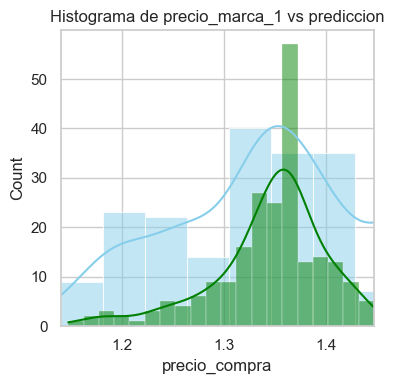

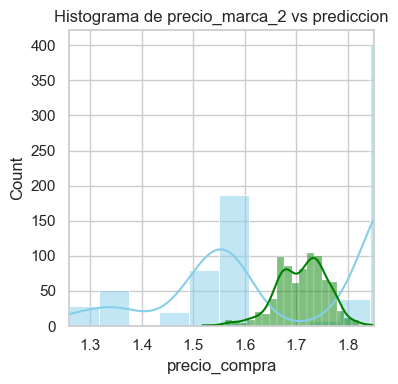

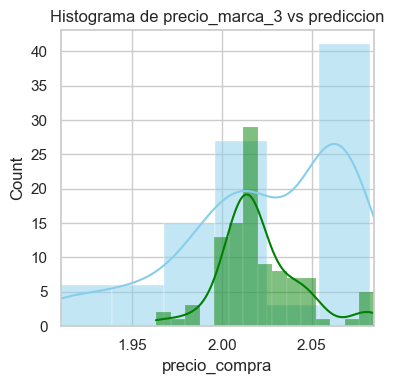

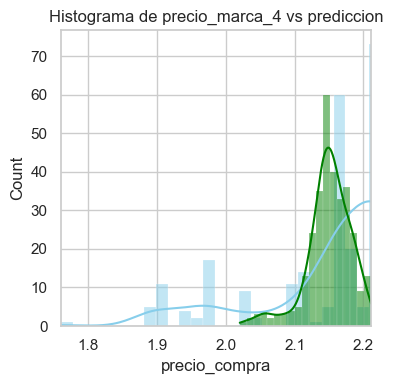

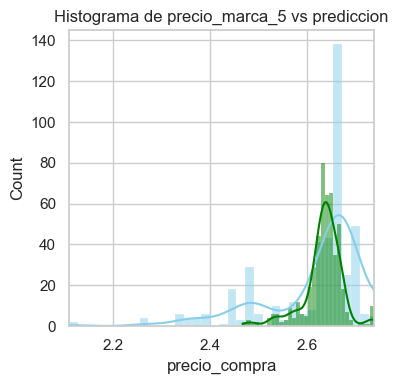

In [199]:
show_distributions(model_0,X_test,y_test,to_use_columns)

In [184]:
model_0.feature_importances_

array([ 13,   9,   8,   9,  37,  61,  82,  92, 111, 141,  96,  57,  84,
        84,  79, 112,  98, 139, 144, 201, 160, 217, 253,   0])

In [185]:
feature_importance_df = pd.DataFrame({'Feature': to_use_columns, 'Importance': model_0.feature_importances_})

In [186]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df['Cumulative Importance'] = feature_importance_df['Importance'].cumsum()
feature_importance_df['percent_acumulated'] = feature_importance_df['Cumulative Importance']/feature_importance_df['Cumulative Importance'].max()
feature_importance_df

,Feature,Importance,Cumulative Importance,percent_acumulated
22,ultima_marca_comprada,253,253,0.110625
21,id_marca,217,470,0.205509
19,precio_compra_median,201,671,0.293397
20,ratio_promo,160,831,0.363358
18,precio_compra_min,144,975,0.426323
9,total_dia_sum,141,1116,0.487976
17,precio_compra_max,139,1255,0.548754
15,dias_ult_compra_full_max,112,1367,0.597726
8,total_dia_median,111,1478,0.646261
16,dias_ult_compra_full_median,98,1576,0.689112


In [187]:
feature_importance_df[feature_importance_df["percent_acumulated"]<0.85]["Feature"].to_list()

['ultima_marca_comprada',
 'id_marca',
 'precio_compra_median',
 'ratio_promo',
 'precio_compra_min',
 'total_dia_sum',
 'precio_compra_max',
 'dias_ult_compra_full_max',
 'total_dia_median',
 'dias_ult_compra_full_median',
 'dias_ult_visita_max',
 'total_dia_min',
 'dias_ult_compra_median',
 'dias_ult_compra_max']

Cliente VIP

In [243]:
dataset_1["id_marca"].value_counts()

id_marca
5    1470
4     426
1      64
2      45
3      12
Name: count, dtype: int64

In [214]:
to_use_columns = ['genero', 'estado_civil', 'nivel_educacion', 'ocupacion',
        'id_marca_mode', 'edad', 'ingreso_anual',
       'total_dia_min', 'total_dia_median', 'total_dia_sum',
       'dias_ult_visita_max', 'dias_ult_visita_median', 'dias_ult_compra_max',
       'dias_ult_compra_median', 'dias_ult_promo_median',
       'dias_ult_compra_full_max', 'dias_ult_compra_full_median',
       'precio_compra_max', 'precio_compra_min', 'precio_compra_median',
       'ratio_promo', 'id_marca',
       'ultima_marca_comprada', 'ultima_cantidad_comprada', 
       ]
to_use_columns = ['ultima_marca_comprada',
 'id_marca',
 'total_dia_median',
 'total_dia_sum',
 'edad',
 'dias_ult_compra_max',
 'dias_ult_compra_full_max',
 'ingreso_anual',
 'ratio_promo',
 'id_marca_mode',
 'total_dia_min',
 'dias_ult_visita_max']
len(to_use_columns)

12

In [215]:
X_train,X_test,y_train,y_test = split_x_y(dataset_1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3463, 39), (866, 39), (3463,), (866,))

In [216]:
model_1 = LGBMRegressor(random_state=1945)
model_1

LGBMRegressor(random_state=1945)

In [217]:
param_grid = {
    'max_depth': [5,10,20,30,-1],
    'random_state': [1945],
}
grid_search = GridSearchCV(
    model_1,
    param_grid,
    scoring=mean_squared_error,
    cv=5,
    n_jobs=-1,
)
grid_search.fit(X_train[to_use_columns],y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 3463, number of used features: 12
[LightGBM] [Info] Start training from score 2.378663
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=1945), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30, -1],
                         'random_state': [1945]},
             scoring=<function mean_squared_error at 0x00000244116A3600>)

In [218]:
grid_search.best_params_

{'max_depth': 5, 'random_state': 1945}

In [219]:
model_1 = LGBMRegressor(random_state=1945,max_depth=5,num_leaves=32)
model_1.fit(X_train[to_use_columns],y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 3463, number of used features: 12
[LightGBM] [Info] Start training from score 2.378663
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMRegressor(max_depth=5, num_leaves=32, random_state=1945)

In [220]:
y_pred = model_1.predict(X_test[to_use_columns])
mean_squared_error(y_test,y_pred)

0.009006936826754828

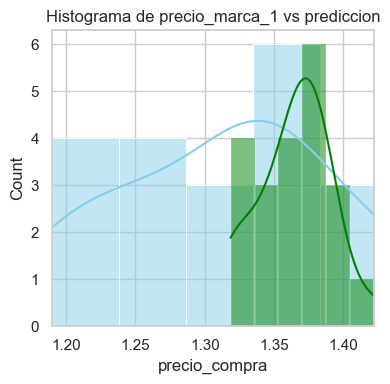

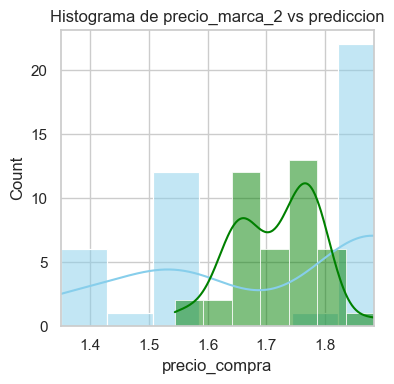

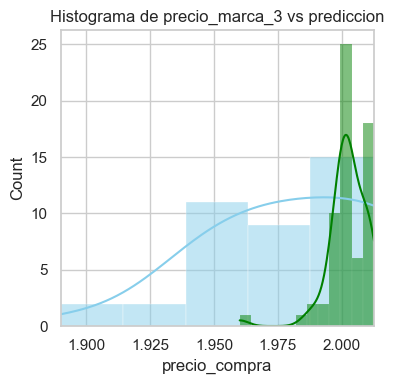

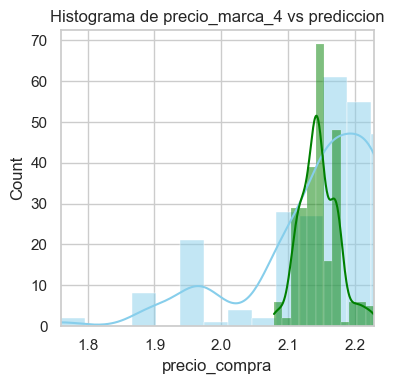

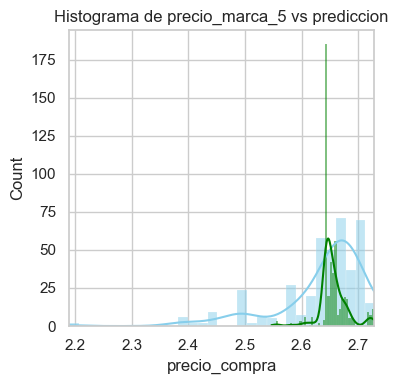

In [221]:
show_distributions(model_1,X_test,y_test,to_use_columns)

In [222]:
feature_importance_df = pd.DataFrame({'Feature': to_use_columns, 'Importance': model_1.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df['Cumulative Importance'] = feature_importance_df['Importance'].cumsum()
feature_importance_df['percent_acumulated'] = feature_importance_df['Cumulative Importance']/feature_importance_df['Cumulative Importance'].max()
feature_importance_df

,Feature,Importance,Cumulative Importance,percent_acumulated
0,ultima_marca_comprada,492,492,0.249366
1,id_marca,292,784,0.397364
2,total_dia_median,243,1027,0.520527
3,total_dia_sum,213,1240,0.628485
4,edad,127,1367,0.692854
8,ratio_promo,120,1487,0.753675
7,ingreso_anual,100,1587,0.804359
5,dias_ult_compra_max,98,1685,0.854029
6,dias_ult_compra_full_max,98,1783,0.903700
11,dias_ult_visita_max,78,1861,0.943234


In [223]:
feature_importance_df[feature_importance_df["percent_acumulated"]<0.85]["Feature"].to_list()

['ultima_marca_comprada',
 'id_marca',
 'total_dia_median',
 'total_dia_sum',
 'edad',
 'ratio_promo',
 'ingreso_anual']

Cliente Ocasional

In [269]:
dataset_2["id_marca"].value_counts()

id_marca
2    3870
1    1021
5     511
3     441
4     416
Name: count, dtype: int64

In [238]:
to_use_columns = ['genero', 'estado_civil', 'nivel_educacion', 'ocupacion',
        'id_marca_mode', 'edad', 'ingreso_anual',
       'total_dia_min', 'total_dia_median', 'total_dia_sum',
       'dias_ult_visita_max', 'dias_ult_visita_median', 'dias_ult_compra_max',
       'dias_ult_compra_median', 'dias_ult_promo_median',
       'dias_ult_compra_full_max', 'dias_ult_compra_full_median',
       'precio_compra_max', 'precio_compra_min', 'precio_compra_median',
       'ratio_promo', 'id_marca',
        'ultima_marca_comprada', 'ultima_cantidad_comprada', 
       ]
to_use_columns = ['id_marca',
 'precio_compra_max',
 'total_dia_min',
 'ultima_marca_comprada',
 'total_dia_sum',
 'dias_ult_compra_full_median',
 'dias_ult_compra_full_max',
 'ingreso_anual',
 'dias_ult_compra_median',
 'total_dia_median',
 'precio_compra_median',
 'precio_compra_min',
 'dias_ult_visita_max']
len(to_use_columns)

13

In [239]:
X_train,X_test,y_train,y_test = split_x_y(dataset_2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((477, 39), (120, 39), (477,), (120,))

In [240]:
model_2 = LGBMRegressor(random_state=1945)
model_2

LGBMRegressor(random_state=1945)

In [241]:
param_grid = {
    'max_depth': [5,10,20,30,-1],
    'random_state': [1945],
}
grid_search = GridSearchCV(
    model_2,
    param_grid,
    scoring=mean_squared_error,
    cv=5,
    n_jobs=-1,
)
grid_search.fit(X_train[to_use_columns],y_train)
grid_search.best_params_

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 13
[LightGBM] [Info] Start training from score 1.870168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

{'max_depth': 5, 'random_state': 1945}

In [242]:
model_2 = LGBMRegressor(random_state=1945, max_depth=5, num_leaves=32)
model_2

LGBMRegressor(max_depth=5, num_leaves=32, random_state=1945)

In [243]:
model_2.fit(X_train[to_use_columns],y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 13
[LightGBM] [Info] Start training from score 1.870168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMRegressor(max_depth=5, num_leaves=32, random_state=1945)

In [244]:
y_pred = model_2.predict(X_test[to_use_columns])
mean_squared_error(y_test,y_pred)

0.030131732970086512

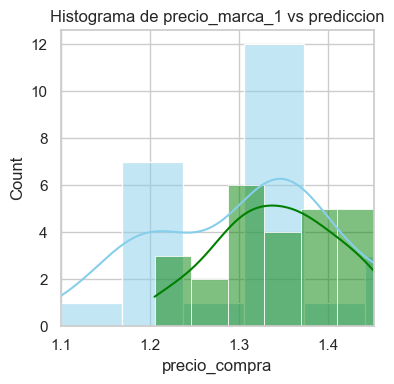

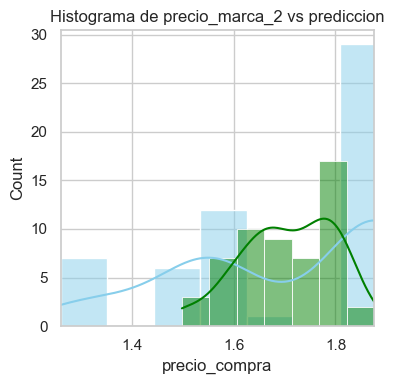

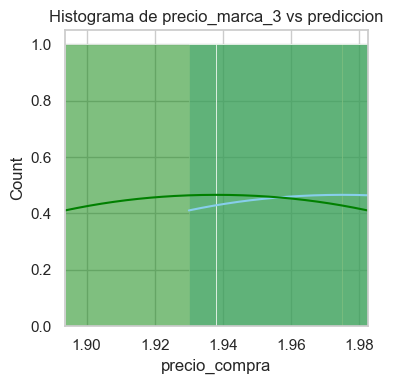

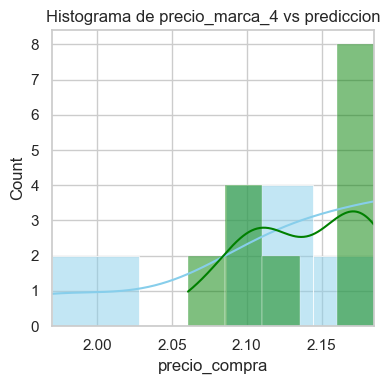

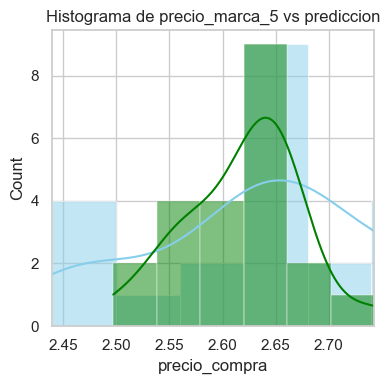

In [245]:
show_distributions(model_2,X_test,y_test,to_use_columns)

In [236]:
feature_importance_df = pd.DataFrame({'Feature': to_use_columns, 'Importance': model_2.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df['Cumulative Importance'] = feature_importance_df['Importance'].cumsum()
feature_importance_df['percent_acumulated'] = feature_importance_df['Cumulative Importance']/feature_importance_df['Cumulative Importance'].max()
feature_importance_df

,Feature,Importance,Cumulative Importance,percent_acumulated
21,id_marca,195,195,0.167959
17,precio_compra_max,92,287,0.247201
7,total_dia_min,90,377,0.324720
22,ultima_marca_comprada,76,453,0.390181
9,total_dia_sum,76,529,0.455642
16,dias_ult_compra_full_median,66,595,0.512489
15,dias_ult_compra_full_max,64,659,0.567614
6,ingreso_anual,59,718,0.618432
13,dias_ult_compra_median,58,776,0.668389
8,total_dia_median,57,833,0.717485


In [237]:
feature_importance_df[feature_importance_df["percent_acumulated"]<0.85]["Feature"].to_list()

['id_marca',
 'precio_compra_max',
 'total_dia_min',
 'ultima_marca_comprada',
 'total_dia_sum',
 'dias_ult_compra_full_median',
 'dias_ult_compra_full_max',
 'ingreso_anual',
 'dias_ult_compra_median',
 'total_dia_median',
 'precio_compra_median',
 'precio_compra_min',
 'dias_ult_visita_max']

## Captura de valor

In [120]:
import warnings
import itertools
from scipy import interpolate
from sklearn.preprocessing import RobustScaler
from scipy.optimize import curve_fit, OptimizeWarning

In [140]:
def one_minus_logistic_function(precio, a, b,):
    aux = np.exp(-a-b*precio)
    return aux/(1+aux)

In [139]:
def get_curve_parameters(x_values, y_values):
    message_optimize_warning = None
    
    with warnings.catch_warnings(record=True) as w:
        warnings.filterwarnings("always", category=OptimizeWarning)
        
        params_opt, _ = curve_fit(one_minus_logistic_function, x_values, y_values)
        
        if (len(w) > 0) and issubclass(w[-1].category, OptimizeWarning):
            message_optimize_warning = str(w[-1].message)
        
        warnings.resetwarnings()
    
    a, b = params_opt
    
    return a, b,, message_optimize_warning

def get_axis_of_fitted_curve(x_values, a, b, scaler):
    x_line = np.linspace(x_values.min(), x_values.max(), 100_000)
    y_line = one_minus_logistic_function(x_line, a, b)
    
    x_line = scaler.inverse_transform(x_line.reshape(-1, 1)).flatten()
    
    return x_line, y_line

In [153]:
def get_segment_demand_model_with_fitted_curve(df
#                                                , rango_asegurados
                                              ):
    a_param, b_param,c_param = None, None, None
    x_values, y_values = None, None
    x_line, y_line = None, None
    
    results = {
        'a_param': a_param,
        'b_param': b_param,
        'c_param': c_param,
        'x_values': x_values,
        'y_values': y_values,
        'x_line': x_line,
        'y_line': y_line
    }
    
    df = df["id_marca"].copy()


    if len(df) < 2:
        # Not enough data to estimate parameters
        # raise Exception("Not enough data to estimate parameters")
        return results


    scaler = RobustScaler()

    x_values = df[["id_marca","precio_compra"]].values
    x_values = scaler.fit_transform(x_values)
    y_values = df["demanda_acum"].values.flatten()

    try:
        # Obtenemos los parámetros para la curva
        a_param, b_param, c_param, message_optimize_warning = get_curve_parameters(x_values, y_values)
        
        if message_optimize_warning is not None:
            print(f"{message_optimize_warning} for the combination (, producto=, " +
                  f"rango_etario=)", flush=True)

        x_line, y_line = get_axis_of_fitted_curve(x_values, a_param, b_param, scaler)

        x_values = scaler.inverse_transform(x_values.reshape(-1, 1)).flatten()
    except Exception as e:
        a_param, b_param, c_param = None, None, None
        x_values, y_values = None, None
        x_line, y_line = None, None
    finally:
        results["a_param"] = a_param
        results["b_param"] = b_param
        results["c_param"] = b_param
        results["x_values"] = x_values
        results["y_values"] = y_values
        results["x_line"] = x_line
        results["y_line"] = y_line
    
    return results

### Calculando el costo

In [144]:
costo_fact = 0.6
p_marca_1 = data_compras["precio_marca_1"].mean()
p_marca_2 = data_compras["precio_marca_2"].mean()
p_marca_3 = data_compras["precio_marca_3"].mean()
p_marca_4 = data_compras["precio_marca_4"].mean()
p_marca_5 = data_compras["precio_marca_5"].mean()
p_marca_1,p_marca_2,p_marca_3,p_marca_4,p_marca_5

(1.392074352989283,
 1.7809989266181656,
 2.0067887141567136,
 2.1599453086398714,
 2.65479767604314)

In [145]:
costos = [
    p_marca_1*costo_fact,
    p_marca_2*costo_fact,
    p_marca_3*costo_fact,
    p_marca_4*costo_fact,
    p_marca_5*costo_fact,
          ]
costos

[0.8352446117935698,
 1.0685993559708993,
 1.204073228494028,
 1.2959671851839227,
 1.592878605625884]

In [146]:
utilidades = [
    p_marca_1 - costos[0],
    p_marca_2 - costos[1],
    p_marca_3 - costos[2],
    p_marca_4 - costos[3],
    p_marca_5 - costos[4],
]
utilidades

[0.5568297411957132,
 0.7123995706472663,
 0.8027154856626855,
 0.8639781234559487,
 1.061919070417256]

In [147]:
dataset_0_ut = dataset_0.groupby(["id_marca","precio_compra"])["cantidad"].sum().reset_index()

In [148]:
dataset_0_ut = dataset_0_ut.sort_values(["id_marca","precio_compra"])
dataset_0_ut

,id_marca,precio_compra,cantidad
0,1,1.10,43
1,1,1.14,80
2,1,1.17,47
3,1,1.19,253
4,1,1.20,45
...,...,...,...
144,5,2.76,51
145,5,2.77,89
146,5,2.78,87
147,5,2.79,220


In [149]:
for i in range(1,6):
    dataset_0_ut.loc[dataset_0_ut["id_marca"] == i,"demanda_acum"] = dataset_0_ut[dataset_0_ut["id_marca"] == i]["cantidad"].cumsum()

In [154]:
get_segment_demand_model_with_fitted_curve(dataset_0_ut)

{'a_param': None,
 'b_param': None,
 'c_param': None,
 'x_values': None,
 'y_values': None,
 'x_line': None,
 'y_line': None}